#Clustering

## Instación de paqueterias

In [1]:
import pandas as pd

In [2]:
!pip install rdkit

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.rdMolDescriptors import CalcTPSA

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

In [5]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, to_tree
import networkx as nx


## Carga base de datos

In [7]:
# https://docs.google.com/spreadsheets/d/1R46hgPIrLxjF15jLvmUPXBMOKgpnWpotHa5Cc578mTY/edit?usp=sharing
div_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1R46hgPIrLxjF15jLvmUPXBMOKgpnWpotHa5Cc578mTY/export?format=csv')
div_df

ID            DB                                             SMILES
0       47035  MedChemRules   COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2coc3[nH]cnc23)c1
1      102444     MOE_Rules  O=c1cc(-c2ccc3c(c2)OC(c2cccc(-c4ccccc4)c2)O3)o...
2       83650  MedChemRules     COC1C(=O)N(CCC(=O)O)CC1OCC1CCCC2(c3ccccc3)CC12
3       31287  MedChemRules  COc1cc(CCc2nc(=S)s[nH]2)ccc1OCc1cccc([N+]2[C-]...
4       91489  MedChemRules  COC1C2CC3CC(CC1(OCC1CC=CC(c4ccccc4)O1)C3)C2CCC...
...       ...           ...                                                ...
10001    6249  MedChemRules   COc1cc(CCc2c[nH]cn2)ccc1OCC1CC2CCC1C(c1ccccc1)N2
10002   94693  MedChemRules          COC1CC(CCC(=O)O)SCC1OCC1C=C(c2ccccc2)CCN1
10003   46682  MedChemRules       COc1cc(CCC(=O)O)ccc1OCC=NNc1c[nH]c2cc[nH]c12
10004    7033  MedChemRules    COC1CC2(OCc3cccc(-c4ccccc4)c3)CC(CCc3cnco3)C1C2
10005   95882  MedChemRules        COC1=CC(CCC(=O)O)=COB1OCC1=CC(c2ccccc2)CNC1

[10006 rows x 3 columns]

In [8]:
# https://docs.google.com/spreadsheets/d/1NsgnQI-A0ale7uZeiUF7pBF91vEOT4ouwlxA3Klz-Bc/edit?usp=sharing
aleatory_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1NsgnQI-A0ale7uZeiUF7pBF91vEOT4ouwlxA3Klz-Bc/export?format=csv')
aleatory_df

ID            DB                                             SMILES
0       4198  MedChemRules  COc1cc(CCS2(=O)=NC(=O)CN2)ccc1OCc1cc2n(n1)C(c1...
1       5202  MedChemRules  COc1cc(CCC2CCC(=O)C2=O)ccc1OCc1cccc([N+]2[C-]O...
2      56235  MedChemRules       COc1sc2c(CCC(=O)O)csc2c1OCc1nc(-c2ccccc2)cs1
3       4064  MedChemRules  COc1cc(CCS2(=O)=NC(=O)CN2)ccc1OCc1cccc(-c2cc[n...
4      45212  MedChemRules    COc1cc(CCC(=O)O)ccc1OCc1csc2cc(C34CC(C3)C4)oc12
...      ...           ...                                                ...
10002   1185  MedChemRules  COc1cc(CCc2no[nH]c2=O)ccc1OCC12CCC(CS1)C(c1ccc...
10003  24300  MedChemRules      COc1cc(CCn2nnc(=O)s2)ccc1OCc1cccc(N2CCSCC2)c1
10004  85293  MedChemRules      COC1CC2(C=CC2CCC(=O)O)C1OCc1cccc(N2CCCC2=O)c1
10005  70065  MedChemRules      COc1cc(CCC(=O)O)ccc1OCC1CC(c2nc3ncoc3o2)=CCN1
10006  39732  MedChemRules  COc1c(OCc2cc3occ(-c4ccccc4)c3s2)sc2nc(CCC(=O)O...

[10007 rows x 3 columns]

In [9]:
# https://docs.google.com/spreadsheets/d/1Jn6e8L8LiEFKJqr5_9jfslzQuGgkxrgTt-CoHuF_t-Y/edit?usp=sharing
extremes_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1Jn6e8L8LiEFKJqr5_9jfslzQuGgkxrgTt-CoHuF_t-Y/export?format=csv')
extremes_df

ID            DB                                             SMILES
0       47035  MedChemRules   COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2coc3[nH]cnc23)c1
1         434  MedChemRules          COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2ccncc2)c1
2         793  MedChemRules          COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2ncccn2)c1
3         677  MedChemRules           COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2ccon2)c1
4       77923  MedChemRules      COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2nc3ccnn3s2)c1
...       ...           ...                                                ...
10001  102356     MOE_Rules    O=C1CC(c2ccc3c(c2)OC(c2cccc(-c4ccccc4)c2)O3)SN1
10002  102444     MOE_Rules  O=c1cc(-c2ccc3c(c2)OC(c2cccc(-c4ccccc4)c2)O3)o...
10003  102275     MOE_Rules    O=C1CC(c2ccc3c(c2)OC(c2cccc(-c4ccccc4)c2)O3)NN1
10004  102533     MOE_Rules  O=c1cc(-c2ccc3c(c2)OC(c2cccc(-c4ccccc4)c2)O3)[...
10005  102193     MOE_Rules    O=C1CC(c2ccc3c(c2)OC(c2cccc(-c4ccccc4)c2)O3)ON1

[10006 rows x 3 columns]

In [10]:
#https://docs.google.com/spreadsheets/d/1TWwcwA7i1IXjNXDtR8TMMvXw5VK24R8zZayDXtpmGKY/edit?usp=sharing
medoids_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1TWwcwA7i1IXjNXDtR8TMMvXw5VK24R8zZayDXtpmGKY/export?format=csv')
medoids_df

ID            DB                                             SMILES
0      47035  MedChemRules   COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2coc3[nH]cnc23)c1
1        434  MedChemRules          COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2ccncc2)c1
2        793  MedChemRules          COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2ncccn2)c1
3        677  MedChemRules           COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2ccon2)c1
4      77923  MedChemRules      COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2nc3ccnn3s2)c1
...      ...           ...                                                ...
10001  77192  MedChemRules      COc1cc(CCC(=O)O)ccc1OCC1CC(c2nc3scnc3o2)=CCN1
10002  84766  MedChemRules           COc1cc(CCC(=O)O)ccc1OCN1CCC(c2cncs2)C1=O
10003  91104  MedChemRules      COc1cc(CCC(=O)O)ccc1OCC1=CC(c2csc3nccn23)SCC1
10004  51775  MedChemRules  COc1cc(CCC(=O)O)sc1OCc1cccc(-c2cc3[nH]ccc3[nH]...
10005  70963  MedChemRules  COc1cc(CCC(=O)O)ccc1OCc1csc2cc(-c3nc4ncoc4s3)c...

[10006 rows x 3 columns]

In [11]:
#https://docs.google.com/spreadsheets/d/1EKjwlGDH9iywBpR1Gh33NMZ1P3UNsejMFGld424Qyo4/edit?usp=sharing
outlier_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1EKjwlGDH9iywBpR1Gh33NMZ1P3UNsejMFGld424Qyo4/export?format=csv')
outlier_df

ID            DB                                             SMILES
0      47035  MedChemRules   COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2coc3[nH]cnc23)c1
1        434  MedChemRules          COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2ccncc2)c1
2        793  MedChemRules          COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2ncccn2)c1
3        677  MedChemRules           COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2ccon2)c1
4      77923  MedChemRules      COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2nc3ccnn3s2)c1
...      ...           ...                                                ...
10001  77192  MedChemRules      COc1cc(CCC(=O)O)ccc1OCC1CC(c2nc3scnc3o2)=CCN1
10002  84766  MedChemRules           COc1cc(CCC(=O)O)ccc1OCN1CCC(c2cncs2)C1=O
10003  91104  MedChemRules      COc1cc(CCC(=O)O)ccc1OCC1=CC(c2csc3nccn23)SCC1
10004  51775  MedChemRules  COc1cc(CCC(=O)O)sc1OCc1cccc(-c2cc3[nH]ccc3[nH]...
10005  70963  MedChemRules  COc1cc(CCC(=O)O)ccc1OCc1csc2cc(-c3nc4ncoc4s3)c...

[10006 rows x 3 columns]

In [12]:
#https://docs.google.com/spreadsheets/d/1np8PRh0ccxyvDXv4iMNthQ4OgU9tMm8TJIAOAoq--oU/edit?usp=sharing
quota_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1np8PRh0ccxyvDXv4iMNthQ4OgU9tMm8TJIAOAoq--oU/export?format=csv')
quota_df

ID            DB                                             SMILES
0      47035  MedChemRules   COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2coc3[nH]cnc23)c1
1      55074  MedChemRules      COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2cn3cccc3s2)c1
2      38439  MedChemRules    COc1cc(CCC(=O)O)ccc1OCc1cc2occ(C3(C)CC3)c2[nH]1
3      91779  MedChemRules      COc1cc(CCC(=O)O)ccc1OCC1CC=CC(C2SC3CCC2CC3)N1
4      30725  MedChemRules  COc1cc(CCc2noc(=S)s2)ccc1OCc1cccc(C2CC3(C=CC3)...
...      ...           ...                                                ...
10001  30216  MedChemRules     COc1cc(CCc2noc(=S)o2)ccc1OCc1cccc(-c2cnccn2)c1
10002  16768  MedChemRules            COc1cc(CCc2nsc(=O)s2)ccc1OCNN=Cc1ccccc1
10003  21737  MedChemRules    COc1sc2c(CCc3nnns3)cccc2c1OCc1cccc(-c2ccccc2)c1
10004   3707  MedChemRules  COC1CC2(CCS3(=O)=NC(=O)CN3)CCC1(OCc1cccc(-c3cc...
10005    118  MedChemRules  COc1cc(CCC(=O)O)ccc1OCc1cccc([N+]2[C-]Sc3ncsc3...

[10006 rows x 3 columns]

In [13]:
#https://docs.google.com/spreadsheets/d/1cYYQO47JNAkYwvkILFMnNdQx4YvsZ2aIYUZTI-gz1aA/edit?usp=sharing
strat_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1cYYQO47JNAkYwvkILFMnNdQx4YvsZ2aIYUZTI-gz1aA/export?format=csv')
strat_df

ID            DB                                             SMILES
0      47035  MedChemRules   COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2coc3[nH]cnc23)c1
1        678  MedChemRules        COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2cc[nH]n2)c1
2        238  MedChemRules              COc1cc(CCC(=O)O)ccc1OCc1cccc(C2CC2)c1
3        506  MedChemRules           COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2cnsn2)c1
4        117  MedChemRules      COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2nc3ocnc3s2)c1
...      ...           ...                                                ...
10001  98063  MedChemRules  COC12CC3CC(CC(CCC(=O)O)(C3)C1)C2OCC1CC(c2ccccc...
10002  98514  MedChemRules  COC12CC3CC(CC(CCC(=O)O)(C3)C1)C2OCC1CC(c2ccccc...
10003  86589  MedChemRules  COC1C(CCC(=O)O)CC(=O)N1OCC12CC3CC(C1)CC(c1cccc...
10004  93207  MedChemRules  COC12CC3CC(CC(CCC(=O)O)(C3)C1)C2OCC1C=CCC(c2cc...
10005  93206  MedChemRules  COC1C2CC3CC(CC1(OCC1C=CCC(c4ccccc4)N1)C3)C2CCC...

[10006 rows x 3 columns]

In [14]:
### Dianat
# https://docs.google.com/spreadsheets/d/12qZaZ2YZVgjUfjjNcXSf0Ys5FhVS6Rv9PvCN_5Tbl9E/edit?usp=sharing
Dianat_df = pd.read_csv('https://docs.google.com/spreadsheets/d/12qZaZ2YZVgjUfjjNcXSf0Ys5FhVS6Rv9PvCN_5Tbl9E/export?format=csv')
Dianat_df

ID                                             SMILES     LogS  \
0      DiaNatDB-1                           O=C(O)C1CC(=O)C(O)C(O)C1 -307.000   
1      DiaNatDB-2        COc1ccc2cc3[n+](cc2c1OC)CCc1cc2c(cc1-3)OCO2   -6.311   
2      DiaNatDB-3                             O=c1c2ccccc2nc2n1CCC2O   -1.644   
3      DiaNatDB-5                              O=C1CCN2Cc3ccccc3NC12   -1.273   
4      DiaNatDB-6  C=C(C)C(=O)OC1=C2C(=C)C(=O)OC2C2C(C=O)CC(=O)C2...   -2.659   
..            ...                                                ...      ...   
331  DiaNatDB-336  O=C(C=Cc1ccc(O)cc1)OC[C@H]1O[C@H](Oc2c(-c3ccc(...   -4.233   
332  DiaNatDB-337  CC(C)=CCC[C@]1(C)C=Cc2c(c(C)cc3c2[nH]c2cc(O)cc...   -4.471   
333  DiaNatDB-338     CC(C)=CCCC1(C)C=Cc2c(c(C)cc3c2[nH]c2ccccc23)O1   -6.743   
334  DiaNatDB-339  COc1cc(/C=C/CO)cc(OC)c1O[C@@H]1O[C@H](CO)[C@@H...   -1.324   
335  DiaNatDB-340  O=C1CC(c2ccc(O)c(O)c2)c2c(cc(O)cc2O[C@@H]2O[C@...   -1.905   

        LogD     LogP  Pgp-inh  Pgp-sub     HIA  F(20%)  F(30%)  ...   MCE-18  \
0     -1.129   -1.541     1.00   137.00  267.00     9.0    29.0  ...   22.667   
1      3.482    4.309    13.00     1.00    3.00    14.0   192.0  ...   56.000   
2    594.000  524.000     3.00    36.00    0.07   928.0   998.0  ...   51.429   
3    871.000    1.162     0.00    11.00   17.00     3.0   239.0  ...   49.467   
4    991.000    1.086     5.00     0.00   54.00     9.0     3.0  ...   52.500   
..       ...      ...      ...      ...     ...     ...     ...  ...      ...   
331    2.291    3.010     7.00     0.43  184.00   372.0   997.0  ...  104.889   
332    4.990    6.571     0.99    15.00   14.00   924.0   448.0  ...   73.600   
333    5.258    6.923   996.00    43.00   11.00    43.0   325.0  ...   70.533   
334 -642.000 -395.000     3.00   936.00  322.00    11.0   566.0  ...   50.769   
335  -88.000 -104.000     2.00   998.00  591.00   917.0   998.0  ...   90.552   

    Natural Product-likeness  Alarm_NMR BMS  Chelating PAINS  Lipinski  \
0                      2.101          0   0          0     0  Accepted   
1                      1.302          1   0          0     0  Accepted   
2                    133.000          0   0          0     0  Accepted   
3                   -104.000          0   0          0     0  Accepted   
4                      1.564          3   3          0     0  Accepted   
..                       ...        ...  ..        ...   ...       ...   
331                    1.648          3   0          0     0  Rejected   
332                    2.721          1   0          0     0  Accepted   
333                    2.478          1   0          0     0  Accepted   
334                    1.913          1   0          0     0  Accepted   
335                    1.937          3   0          1     1  Rejected   

       Pfizer       GSK  GoldenTriangle  
0    Accepted  Accepted        Rejected  
1    Rejected  Rejected        Accepted  
2    Accepted  Accepted        Accepted  
3    Accepted  Accepted        Rejected  
4    Accepted  Accepted        Accepted  
..        ...       ...             ...  
331  Accepted  Rejected        Rejected  
332  Rejected  Rejected        Accepted  
333  Rejected  Rejected        Rejected  
334  Accepted  Accepted        Accepted  
335  Accepted  Rejected        Accepted  

[336 rows x 90 columns]

In [15]:
# https://docs.google.com/spreadsheets/d/1Y6HfrBuZi46VPSo7jj54sCzRunHuPqQGXqnmM_G6pw4/edit?usp=sharing
T2DMdf_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1Y6HfrBuZi46VPSo7jj54sCzRunHuPqQGXqnmM_G6pw4/export?format=csv')
T2DMdf_df
columnas_seleccionadas = ['ID', 'SMILES', "QED", "Synth", "PAINS", "Lipinski"]
T2DM_df = T2DMdf_df[columnas_seleccionadas]
T2DM_df

ID                                             SMILES     QED  Synth  \
0    1  COC(=O)C12CCC(C)(C)C=C1C1CCC3C4(C)CCC(=O)C(C)(...  295.00  4.687   
1    2          COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2ccccc2)c1  615.00  1.764   
2    3   COc1ccc(C=C2SC(=O)NC2=O)cc1OCc1cccc(-c2ccccc2)c1  554.00  2.167   
3    4      O=C1NC(=O)C(=Cc2ccc(OCc3nc4ccccc4[nH]3)cc2)S1  703.00  2.318   
4    5      COc1cc(C=C2SC(=O)NC2=O)ccc1OCc1nc2ccccc2[nH]1  658.00  2.381   
..  ..                                                ...     ...    ...   
86  87      CCOc1ccc(Cc2cc(C3OC(SC)C(O)C(O)C3O)ccc2Cl)cc1  661.00  3.694   
87  88  COc1c(C2OC(CO)C(C)C(O)C2O)cc(Cc2ccc3c(c2)OCCO3...  623.00  4.179   
88  89   OCC1OC(c2ccc(Cl)c(Cc3ccc4c(c3)CC4)c2)C(O)C(O)C1O  636.00  3.630   
89  90   CCc1ccc(C2OC(CO)C(O)C(O)C2O)cc1Cc1ccc2c(c1)OCCO2  579.00  3.728   
90  91  COc1cc(O)c(C2OC(CO)C(F)(F)C(O)C2O)cc1Cc1ccc2c(...    0.55  4.105   

    PAINS  Lipinski  
0       0  Accepted  
1       0  Accepted  
2       0  Accepted  
3       0  Accepted  
4       0  Accepted  
..    ...       ...  
86      0  Accepted  
87      0  Accepted  
88      0  Accepted  
89      0  Accepted  
90      0  Accepted  

[91 rows x 6 columns]

In [16]:
## Approved_Drugs_T2DM ##
ApprovedT2DMdf_df = pd.read_csv('https://docs.google.com/spreadsheets/d/12rMrFbtww9PFJ3gE-hhkzbxpertQLbtDtyo32-rn9X8/export?format=csv')
columnas_seleccionadas = ['ID', 'SMILES', "QED", "Synth", "PAINS", "Lipinski"]
ApprovedT2DM_df = ApprovedT2DMdf_df[columnas_seleccionadas]
ApprovedT2DM_df

ID                                             SMILES     QED  Synth  \
0   DB00284  CC1OC(OC2C(CO)OC(OC(C(=O)C(O)CO)C(O)CO)C(O)C2O...   83.00  5.731   
1   DB06203         Cn1c(=O)cc(N2CCCC(N)C2)n(Cc2ccccc2C#N)c1=O  873.00  3.025   
2   DB01076  CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...  163.00  3.305   
3   DB12236  OCC1OC(c2ccc(Cl)c(Cc3ccc(OCCOC4CC4)cc3)c2)C(O)...    0.42  3.670   
4   DB01200  CC(C)CC1C(=O)N2CCCC2C2(O)OC(NC(=O)C3=CC4c5cccc...  456.00  5.133   
5   DB08907  Cc1ccc(C2OC(CO)C(O)C(O)C2O)cc1Cc1ccc(-c2ccc(F)...  486.00  3.685   
6   DB00672                    CCCNC(=O)NS(=O)(=O)c1ccc(Cl)cc1  879.00  1.799   
7   DB00930                             C=CCNCCCCCC[N+](C)(C)C    0.34  2.652   
8   DB06292      CCOc1ccc(Cc2cc(C3OC(CO)C(O)C(O)C3O)ccc2Cl)cc1  582.00  3.453   
9   DB09038  OCC1OC(c2ccc(Cl)c(Cc3ccc(OC4CCOC4)cc3)c2)C(O)C...  529.00  3.844   
10  DB11827  CCOc1ccc(Cc2cc(C34OCC(CO)(O3)C(O)C(O)C4O)ccc2C...  541.00  4.725   
11  DB16165  CCOc1ncc(C)c2c1C(c1ccc(C#N)cc1OC)C(C(N)=O)C(C)=N2    0.86  3.708   
12  DB12412  NC(CC(=O)N1CCc2c(nc(C(F)(F)F)nc2C(F)(F)F)C1)CN...  656.00  3.832   
13  DB01120            Cc1ccc(S(=O)(=O)NC(=O)NN2CC3CCCC3C2)cc1  886.00  3.130   
14  DB00222  CCc1c(C)cn(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCC...  473.00  2.826   
15  DB01067  Cc1cnc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)...  598.00  2.344   
16  DB01251  COc1ccc2c(c1)C(=O)N(CCc1ccc(S(=O)(=O)NC(=O)NC3...  532.00  2.581   
17  DB01016  COc1ccc(Cl)cc1C(=O)NCCc1ccc(S(=O)(=O)NC(=O)NC2...  519.00  2.192   
18  DB08882  CC#CCn1c(N2CCCC(N)C2)nc2c1c(=O)n(Cc1nc(C)c3ccc...  443.00  3.414   
19  DB00166                                  O=C(O)CCCCC1CCSS1  554.00  3.171   
20  DB00678  CCCCc1nc(Cl)c(CO)n1Cc1ccc(-c2ccccc2-c2nn[nH]n2...  442.00  2.493   
21  DB12214   CCOc1ccc(Cc2cc(C3SC(CO)C(O)C(O)C3O)c(OC)cc2C)cc1    0.53  3.847   
22  DB00331                                  CN(C)C(N)=NC(=N)N  282.00  3.423   
23  DB00491                             OCCN1CC(O)C(O)C(O)C1CO  333.00  3.831   
24  DB01252              O=C(O)C(CC(=O)N1CC2CCCCC2C1)Cc1ccccc1  909.00  3.027   
25  DB00731            CC(C)C1CCC(C(=O)NC(Cc2ccccc2)C(=O)O)CC1  846.00  2.344   
26  DB01132          CCc1ccc(CCOc2ccc(Cc3sc(=O)[nH]c3O)cc2)nc1  681.00  2.458   
27  DB01278  CCC(C)C(NC(=O)C1CCCN1C(=O)CNC(=O)C(Cc1ccccc1)N...    8.00  9.961   
28  DB00912  CCOc1cc(CC(=O)NC(CC(C)C)c2ccccc2N2CCCCC2)ccc1C...  517.00  2.767   
29  DB00412          CN(CCOc1ccc(Cc2sc(=O)[nH]c2O)cc1)c1ccccn1    0.68  2.501   
30  DB06335      N#CC1CC2CC2N1C(=O)C(N)C12CC3CC(CC(O)(C3)C1)C2    0.80  5.665   
31  DB13928  CCC(C)C(NC(=O)C(Cc1ccccc1)NC(=O)C(CCC(=O)O)NC(...    0.01  9.931   
32  DB00641  CCC(C)(C)C(=O)OC1CC(C)C=C2C=CC(C)C(CCC3CC(O)CC...  639.00  4.655   
33  DB01261  NC(CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)c(F)cc1F  622.00  3.251   
34  DB12713      CCOc1ccc(Cc2cc(C3OC(SC)C(O)C(O)C3O)ccc2Cl)cc1  661.00  3.694   
35  DB11950  Cc1cc(N2CCN(C3CNC(C(=O)N4CCSC4)C3)CC2)n(-c2ccc...  801.00  3.541   
36  DB00839               Cc1ccc(S(=O)(=O)NC(=O)NN2CCCCCC2)cc1  892.00  2.128   
37  DB01124                    CCCCNC(=O)NS(=O)(=O)c1ccc(C)cc1  801.00  1.786   
38  DB00273         CC1(C)OC2COC3(COS(N)(=O)=O)OC(C)(C)OC3C2O1  739.00  4.490   
39  DB15323      Cn1c(=O)cc(N2CCCC(N)C2)n(Cc2cc(F)ccc2C#N)c1=O  864.00  3.150   
40  DB04876           N#CC1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2  821.00  4.962   
41  DB04878                     OCC(CO)NC1CC(O)(CO)C(O)C(O)C1O  248.00  4.495   

    PAINS  Lipinski  
0       0  Rejected  
1       0  Accepted  
2       0  Accepted  
3       0  Accepted  
4       0  Accepted  
5       0  Accepted  
6       0  Accepted  
7       0  Accepted  
8       0  Accepted  
9       0  Accepted  
10      0  Accepted  
11      0  Accepted  
12      0  Accepted  
13      0  Accepted  
14      0  Accepted  
15      0  Accepted  
16      0  Accepted  
17      0  Accepted  
18      0  Accepted  
19      0  Accepted  
20      0  Accepted  
21      0  Accepted  
22      0  Accepted

In [17]:
MultiPTP1Bdf_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1br3FD9JtTxlr6b4SdXiebcuJrOTEX6Ml32-EXyrfNa4/export?format=csv')
columnas_seleccionadas = ['SMILES', "QED", "Synth", "PAINS", "Lipinski"]
MultiPTP1B_df = MultiPTP1Bdf_df[columnas_seleccionadas]
MultiPTP1B_df

SMILES     QED  Synth  PAINS  \
0    CON1C(=O)CN(CC2=NC(=O)NC2=O)CC1OCc1cccc(-c2ccc...  727.00  3.518      0   
1      COc1cn(CC2=NC(=O)NC2=O)cc1OCc1cccc(-c2ccccc2)c1  671.00  2.810      0   
2           COc1ccc(CC(=O)O)cc1OCC1CC2(CCC2c2ccccc2)C1  773.00  3.297      0   
3          COc1ccc(CC(=O)O)cc1OCC1CCC(=O)N(c2ccccc2)C1  811.00  2.528      0   
4          COc1ccc(CC(=O)O)cc1OCC1OC2CCC1C(c1ccccc1)C2  783.00  4.190      0   
..                                                 ...     ...    ...    ...   
811          COC1OC(SCC(=O)O)OCC1OCc1cccc(-c2ccccc2)c1  741.00  3.654      0   
812           COC1OC(SCC(=O)O)NC1OCc1cccc(-c2ccccc2)c1  735.00  3.769      0   
813       COC1CC(OCc2cccc(-c3ccccc3)c2)COC(SCC(=O)O)O1  718.00  3.715      0   
814       COC1=C(OCc2cccc(-c3ccccc3)c2)COC(SCC(=O)O)C1    0.73  3.291      0   
815          COC1CC(SCC(=O)O)OCC1OCc1cccc(-c2ccccc2)c1  742.00  3.507      0   

     Lipinski  
0    Accepted  
1    Accepted  
2    Accepted  
3    Accepted  
4    Accepted  
..        ...  
811  Accepted  
812  Accepted  
813  Accepted  
814  Accepted  
815  Accepted  

[816 rows x 5 columns]

## Cálculo de identificadores químicos

calcular identificadores químicos

In [18]:
aleatory_df
extremes_df
medoids_df
outlier_df
quota_df
strat_df
Dianat_df
T2DM_df
ApprovedT2DM_df
MultiPTP1B_df
div_df

ID            DB                                             SMILES
0       47035  MedChemRules   COc1cc(CCC(=O)O)ccc1OCc1cccc(-c2coc3[nH]cnc23)c1
1      102444     MOE_Rules  O=c1cc(-c2ccc3c(c2)OC(c2cccc(-c4ccccc4)c2)O3)o...
2       83650  MedChemRules     COC1C(=O)N(CCC(=O)O)CC1OCC1CCCC2(c3ccccc3)CC12
3       31287  MedChemRules  COc1cc(CCc2nc(=S)s[nH]2)ccc1OCc1cccc([N+]2[C-]...
4       91489  MedChemRules  COC1C2CC3CC(CC1(OCC1CC=CC(c4ccccc4)O1)C3)C2CCC...
...       ...           ...                                                ...
10001    6249  MedChemRules   COc1cc(CCc2c[nH]cn2)ccc1OCC1CC2CCC1C(c1ccccc1)N2
10002   94693  MedChemRules          COC1CC(CCC(=O)O)SCC1OCC1C=C(c2ccccc2)CCN1
10003   46682  MedChemRules       COc1cc(CCC(=O)O)ccc1OCC=NNc1c[nH]c2cc[nH]c12
10004    7033  MedChemRules    COC1CC2(OCc3cccc(-c4ccccc4)c3)CC(CCc3cnco3)C1C2
10005   95882  MedChemRules        COC1=CC(CCC(=O)O)=COB1OCC1=CC(c2ccccc2)CNC1

[10006 rows x 3 columns]

In [19]:
# Función para calcular las propiedades
def calculate_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mol_weight = Descriptors.MolWt(mol)
        logp = MolLogP(mol)
        tpsa = CalcTPSA(mol)
        nrb = Descriptors.NumRotatableBonds(mol)
        hba = Descriptors.NumHAcceptors(mol)
        hbd = Descriptors.NumHDonors(mol)
        return pd.Series([mol_weight, logp, tpsa, nrb, hba, hbd])
    else:
        return pd.Series([None, None, None, None, None, None])

# Lista de DataFrames
dfs = [aleatory_df, extremes_df, medoids_df, outlier_df, quota_df, strat_df, Dianat_df, T2DM_df, ApprovedT2DM_df, div_df]

# Iterar sobre cada DataFrame en la lista
for i, df in enumerate(dfs):
    # Aplicar la función a la columna 'SMILES' de cada DataFrame
    df[['MolWt', 'LogP', 'TPSA', 'nRB', 'HBA', 'HBD']] = df['SMILES'].apply(calculate_properties)

    # Mostrar el DataFrame resultante para cada DataFrame
    print(f"DataFrame {i+1} (nombre del df):")
    print(df)



DataFrame 1 (nombre del df):
          ID            DB                                             SMILES  \
0       4198  MedChemRules  COc1cc(CCS2(=O)=NC(=O)CN2)ccc1OCc1cc2n(n1)C(c1...   
1       5202  MedChemRules  COc1cc(CCC2CCC(=O)C2=O)ccc1OCc1cccc([N+]2[C-]O...   
2      56235  MedChemRules       COc1sc2c(CCC(=O)O)csc2c1OCc1nc(-c2ccccc2)cs1   
3       4064  MedChemRules  COc1cc(CCS2(=O)=NC(=O)CN2)ccc1OCc1cccc(-c2cc[n...   
4      45212  MedChemRules    COc1cc(CCC(=O)O)ccc1OCc1csc2cc(C34CC(C3)C4)oc12   
...      ...           ...                                                ...   
10002   1185  MedChemRules  COc1cc(CCc2no[nH]c2=O)ccc1OCC12CCC(CS1)C(c1ccc...   
10003  24300  MedChemRules      COc1cc(CCn2nnc(=O)s2)ccc1OCc1cccc(N2CCSCC2)c1   
10004  85293  MedChemRules      COC1CC2(C=CC2CCC(=O)O)C1OCc1cccc(N2CCCC2=O)c1   
10005  70065  MedChemRules      COc1cc(CCC(=O)O)ccc1OCC1CC(c2nc3ncoc3o2)=CCN1   
10006  39732  MedChemRules  COc1c(OCc2cc3occ(-c4ccccc4)c3s2)sc2nc(CCC(=O)O...   

Realizar promedio para cada identificador agrupando por grupo ATC

In [20]:
# Borrable

# Suponiendo que ya has calculado las propiedades y las has añadido a cada DataFrame
dfs = [aleatory_df, extremes_df, medoids_df, outlier_df, quota_df, strat_df, Dianat_df, T2DM_df, ApprovedT2DM_df, div_df]

# Crear un diccionario para almacenar los promedios de cada identificador químico por DataFrame
averages_dict = {}

# Iterar sobre cada DataFrame en la lista
for i, df in enumerate(dfs):
    # Calcular el promedio de las propiedades
    averages = df[['MolWt', 'LogP', 'TPSA', 'nRB', 'HBA', 'HBD']].mean()

    # Almacenar el resultado en el diccionario con una clave basada en el nombre del DataFrame
    averages_dict[f'df_{i+1}_averages'] = averages

# Mostrar el diccionario con los promedios
for key, value in averages_dict.items():
    print(f"Promedios para {key}:")
    print(value)
    print("\n")

Promedios para df_1_averages:
MolWt    414.408553
LogP       4.232256
TPSA      83.097282
nRB        7.984111
HBA        5.954432
HBD        1.421105
dtype: float64


Promedios para df_2_averages:
MolWt    398.111937
LogP       3.985933
TPSA      76.946462
nRB        8.015791
HBA        5.073156
HBD        1.391965
dtype: float64


Promedios para df_3_averages:
MolWt    400.338591
LogP       4.354559
TPSA      84.966609
nRB        8.043074
HBA        5.569758
HBD        1.603438
dtype: float64


Promedios para df_4_averages:
MolWt    400.338591
LogP       4.354559
TPSA      84.966609
nRB        8.043074
HBA        5.569758
HBD        1.603438
dtype: float64


Promedios para df_5_averages:
MolWt    406.373143
LogP       4.163082
TPSA      80.034174
nRB        7.997002
HBA        5.493304
HBD        1.406756
dtype: float64


Promedios para df_6_averages:
MolWt    414.215214
LogP       4.238524
TPSA      82.922275
nRB        7.987108
HBA        5.935039
HBD        1.432441
dtype: float64


Se usarán en lugar de los promedios, se emplearan las "medianas".


In [21]:
dfs = [aleatory_df, extremes_df, medoids_df, outlier_df, quota_df, strat_df, Dianat_df, T2DM_df, ApprovedT2DM_df, div_df]

# Suponiendo que ya has calculado las propiedades y las has añadido a cada DataFrame
dfs = {
    'Aleatory': aleatory_df,
    'Extremes': extremes_df,
    'Medoids': medoids_df,
    'Outliers': outlier_df,
    'Quota': quota_df,
    'Strat': strat_df,
    'Dianat': Dianat_df,
    'T2DM': T2DM_df,
    'ApprovedT2DM': ApprovedT2DM_df,
    'Divi': div_df,

}

# Crear un DataFrame vacío para almacenar todos los promedios
averages_df = pd.DataFrame()

for name, df in dfs.items():
    # Calcular el promedio de las propiedades
    averages = df[['MolWt', 'LogP', 'TPSA', 'nRB', 'HBA', 'HBD']].median()

    # Convertir los promedios en un DataFrame y añadir la columna con el nombre del DataFrame
    averages = averages.to_frame().T
    averages['DataFrame'] = name

    # Concatenar los resultados en un solo DataFrame
    averages_df = pd.concat([averages_df, averages], ignore_index=True)

# Mostrar el DataFrame resultante
print("Promedios de propiedades por DataFrame:")
print(averages_df)


Promedios de propiedades por DataFrame:
     MolWt     LogP    TPSA  nRB  HBA  HBD     DataFrame
0  414.483  4.24700  82.040  8.0  6.0  1.0      Aleatory
1  397.452  4.00870  76.070  8.0  5.0  1.0      Extremes
2  399.428  4.38330  84.440  8.0  5.0  2.0       Medoids
3  399.428  4.38330  84.440  8.0  5.0  2.0      Outliers
4  406.482  4.21130  79.950  8.0  5.0  1.0         Quota
5  414.487  4.25065  82.040  8.0  6.0  1.0         Strat
6  359.464  2.13835  98.745  3.0  6.0  3.0        Dianat
7  439.577  4.74552  88.940  7.0  6.0  1.0          T2DM
8  413.726  2.01000  94.780  5.5  6.0  2.0  ApprovedT2DM
9  406.482  3.92400  76.070  8.0  5.0  1.0          Divi


## Normalización de Datos

In [22]:
averages_df

MolWt     LogP    TPSA  nRB  HBA  HBD     DataFrame
0  414.483  4.24700  82.040  8.0  6.0  1.0      Aleatory
1  397.452  4.00870  76.070  8.0  5.0  1.0      Extremes
2  399.428  4.38330  84.440  8.0  5.0  2.0       Medoids
3  399.428  4.38330  84.440  8.0  5.0  2.0      Outliers
4  406.482  4.21130  79.950  8.0  5.0  1.0         Quota
5  414.487  4.25065  82.040  8.0  6.0  1.0         Strat
6  359.464  2.13835  98.745  3.0  6.0  3.0        Dianat
7  439.577  4.74552  88.940  7.0  6.0  1.0          T2DM
8  413.726  2.01000  94.780  5.5  6.0  2.0  ApprovedT2DM
9  406.482  3.92400  76.070  8.0  5.0  1.0          Divi

In [23]:
averages

MolWt   LogP   TPSA  nRB  HBA  HBD DataFrame
0  406.482  3.924  76.07  8.0  5.0  1.0      Divi

In [24]:
le_atp = LabelEncoder()
averages_df['DataFrames'] = le_atp.fit_transform(averages_df['DataFrame'])

data = averages_df[['DataFrames', 'MolWt', 'LogP', 'TPSA', 'nRB', 'HBA', 'HBD']].values
data

array([[  0.     , 414.483  ,   4.247  ,  82.04   ,   8.     ,   6.     ,
          1.     ],
       [  4.     , 397.452  ,   4.0087 ,  76.07   ,   8.     ,   5.     ,
          1.     ],
       [  5.     , 399.428  ,   4.3833 ,  84.44   ,   8.     ,   5.     ,
          2.     ],
       [  6.     , 399.428  ,   4.3833 ,  84.44   ,   8.     ,   5.     ,
          2.     ],
       [  7.     , 406.482  ,   4.2113 ,  79.95   ,   8.     ,   5.     ,
          1.     ],
       [  8.     , 414.487  ,   4.25065,  82.04   ,   8.     ,   6.     ,
          1.     ],
       [  2.     , 359.464  ,   2.13835,  98.745  ,   3.     ,   6.     ,
          3.     ],
       [  9.     , 439.577  ,   4.74552,  88.94   ,   7.     ,   6.     ,
          1.     ],
       [  1.     , 413.726  ,   2.01   ,  94.78   ,   5.5    ,   6.     ,
          2.     ],
       [  3.     , 406.482  ,   3.924  ,  76.07   ,   8.     ,   5.     ,
          1.     ]])

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Asegúrate de que averages_df esté definido como en los pasos anteriores
# averages_df tiene las columnas: 'MolWt', 'LogP', 'TPSA', 'nRB', 'HBA', 'HBD', 'DataFrame'

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Seleccionar solo las columnas que deseas normalizar
columns_to_scale = ['MolWt', 'LogP', 'TPSA', 'nRB', 'HBA', 'HBD']

# Aplicar la normalización por z-score
scaled_data = scaler.fit_transform(averages_df[columns_to_scale])

# Crear un nuevo DataFrame con los datos normalizados
scaled_df = pd.DataFrame(scaled_data, index=averages_df.index, columns=columns_to_scale)

# Añadir la columna 'DataFrame' al DataFrame normalizado
scaled_df['DataFrame'] = averages_df['DataFrame'].values

# Mostrar el DataFrame resultante
print("DataFrame con las propiedades normalizadas por z-score:")
print(scaled_df)


DataFrame con las propiedades normalizadas por z-score:
      MolWt      LogP      TPSA       nRB  HBA       HBD     DataFrame
0  0.491181  0.461349 -0.382462  0.537319  1.0 -0.745356      Aleatory
1 -0.400443  0.197571 -1.224543  0.537319 -1.0 -0.745356      Extremes
2 -0.296993  0.612221 -0.043938  0.537319 -1.0  0.745356       Medoids
3 -0.296993  0.612221 -0.043938  0.537319 -1.0  0.745356      Outliers
4  0.072305  0.421832 -0.677261  0.537319 -1.0 -0.745356         Quota
5  0.491390  0.465389 -0.382462  0.537319  1.0 -0.745356         Strat
6 -2.389227 -1.872747  1.973811 -2.623379  1.0  2.236068        Dianat
7  1.804926  1.013168  0.590796 -0.094821  1.0 -0.745356          T2DM
8  0.451549 -2.014819  1.414540 -1.043030  1.0  0.745356  ApprovedT2DM
9  0.072305  0.103815 -1.224543  0.537319 -1.0 -0.745356          Divi


Normalización Mín-Max
de 0 a 1

In [26]:
# Ejemplo usando MinMaxScaler para normalización
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Ahora scaled_data contiene tus datos normalizados
data  = scaled_data

In [27]:
data

array([[0.        , 0.68676744, 0.81776043, 0.26328556, 1.        ,
        1.        , 0.        ],
       [0.44444444, 0.47418022, 0.73064719, 0.        , 1.        ,
        0.        , 0.        ],
       [0.55555556, 0.49884538, 0.86758642, 0.369129  , 1.        ,
        0.        , 0.5       ],
       [0.66666667, 0.49884538, 0.86758642, 0.369129  , 1.        ,
        0.        , 0.5       ],
       [0.77777778, 0.58689601, 0.80470989, 0.17111356, 1.        ,
        0.        , 0.        ],
       [0.88888889, 0.68681737, 0.81909472, 0.26328556, 1.        ,
        1.        , 0.        ],
       [0.22222222, 0.        , 0.04691978, 1.        , 0.        ,
        1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.56758545, 0.8       ,
        1.        , 0.        ],
       [0.11111111, 0.67731829, 0.        , 0.82513782, 0.5       ,
        1.        , 0.5       ],
       [0.33333333, 0.58689601, 0.69968416, 0.        , 1.        ,
        0.        , 0. 

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Ya no necesitas usar LabelEncoder en este caso, ya que estamos trabajando con nombres de DataFrames
# averages['ATC Type Encoded'] = le_atp.fit_transform(averages['ATC Type'])

# Supongamos que tienes el DataFrame 'averages_df' con la columna 'DataFrame'
# Normaliza solo las columnas de propiedades químicas
scaler = StandardScaler()
columns_to_scale = ['MolWt', 'LogP', 'TPSA', 'nRB', 'HBA', 'HBD']

# Aplicar la normalización z-score
scaled_datas = scaler.fit_transform(averages_df[columns_to_scale])

# Crear un nuevo DataFrame con los datos normalizados
scaled_df = pd.DataFrame(scaled_datas, index=averages_df.index, columns=columns_to_scale)

# Añadir la columna 'DataFrame' al DataFrame normalizado
scaled_df['DataFrame'] = averages_df['DataFrame'].values

# Mostrar el DataFrame resultante
print(scaled_df)


      MolWt      LogP      TPSA       nRB  HBA       HBD     DataFrame
0  0.491181  0.461349 -0.382462  0.537319  1.0 -0.745356      Aleatory
1 -0.400443  0.197571 -1.224543  0.537319 -1.0 -0.745356      Extremes
2 -0.296993  0.612221 -0.043938  0.537319 -1.0  0.745356       Medoids
3 -0.296993  0.612221 -0.043938  0.537319 -1.0  0.745356      Outliers
4  0.072305  0.421832 -0.677261  0.537319 -1.0 -0.745356         Quota
5  0.491390  0.465389 -0.382462  0.537319  1.0 -0.745356         Strat
6 -2.389227 -1.872747  1.973811 -2.623379  1.0  2.236068        Dianat
7  1.804926  1.013168  0.590796 -0.094821  1.0 -0.745356          T2DM
8  0.451549 -2.014819  1.414540 -1.043030  1.0  0.745356  ApprovedT2DM
9  0.072305  0.103815 -1.224543  0.537319 -1.0 -0.745356          Divi


## Clustering Jerarquico

In [29]:
scaled_df.set_index('DataFrame', inplace=True)
scaled_df

MolWt      LogP      TPSA       nRB  HBA       HBD
DataFrame                                                          
Aleatory      0.491181  0.461349 -0.382462  0.537319  1.0 -0.745356
Extremes     -0.400443  0.197571 -1.224543  0.537319 -1.0 -0.745356
Medoids      -0.296993  0.612221 -0.043938  0.537319 -1.0  0.745356
Outliers     -0.296993  0.612221 -0.043938  0.537319 -1.0  0.745356
Quota         0.072305  0.421832 -0.677261  0.537319 -1.0 -0.745356
Strat         0.491390  0.465389 -0.382462  0.537319  1.0 -0.745356
Dianat       -2.389227 -1.872747  1.973811 -2.623379  1.0  2.236068
T2DM          1.804926  1.013168  0.590796 -0.094821  1.0 -0.745356
ApprovedT2DM  0.451549 -2.014819  1.414540 -1.043030  1.0  0.745356
Divi          0.072305  0.103815 -1.224543  0.537319 -1.0 -0.745356

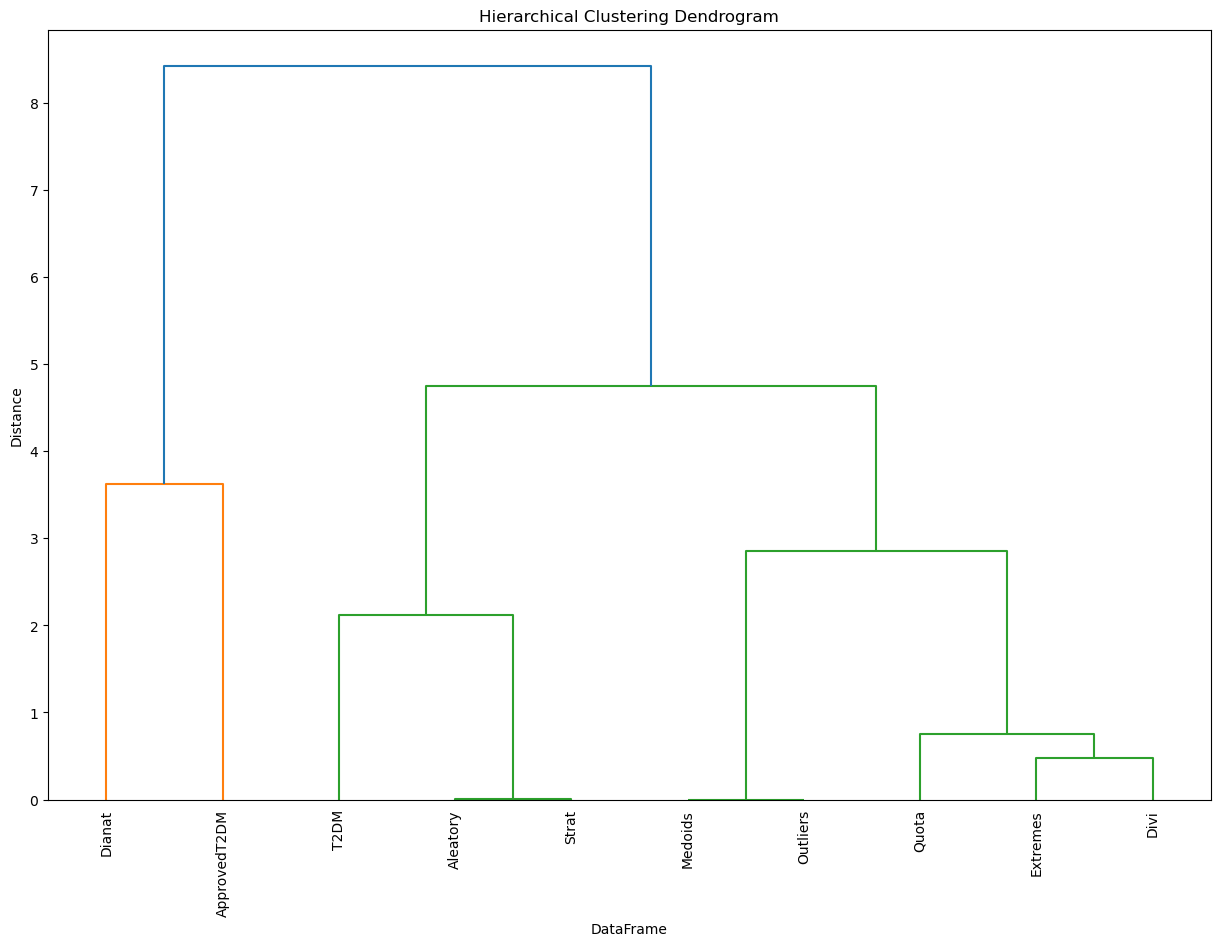

In [30]:
# Asegúrate de que scaled_df esté definido correctamente y contiene la columna 'DataFrame'
# Calcular la matriz de distancias y realizar el clustering jerárquico
Z = linkage(scaled_df, method='ward')  # Excluir la columna 'DataFrame' para el clustering

# Crear el dendrograma
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=scaled_df.index, leaf_rotation=90., leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('DataFrame')
plt.ylabel('Distance')
plt.show()


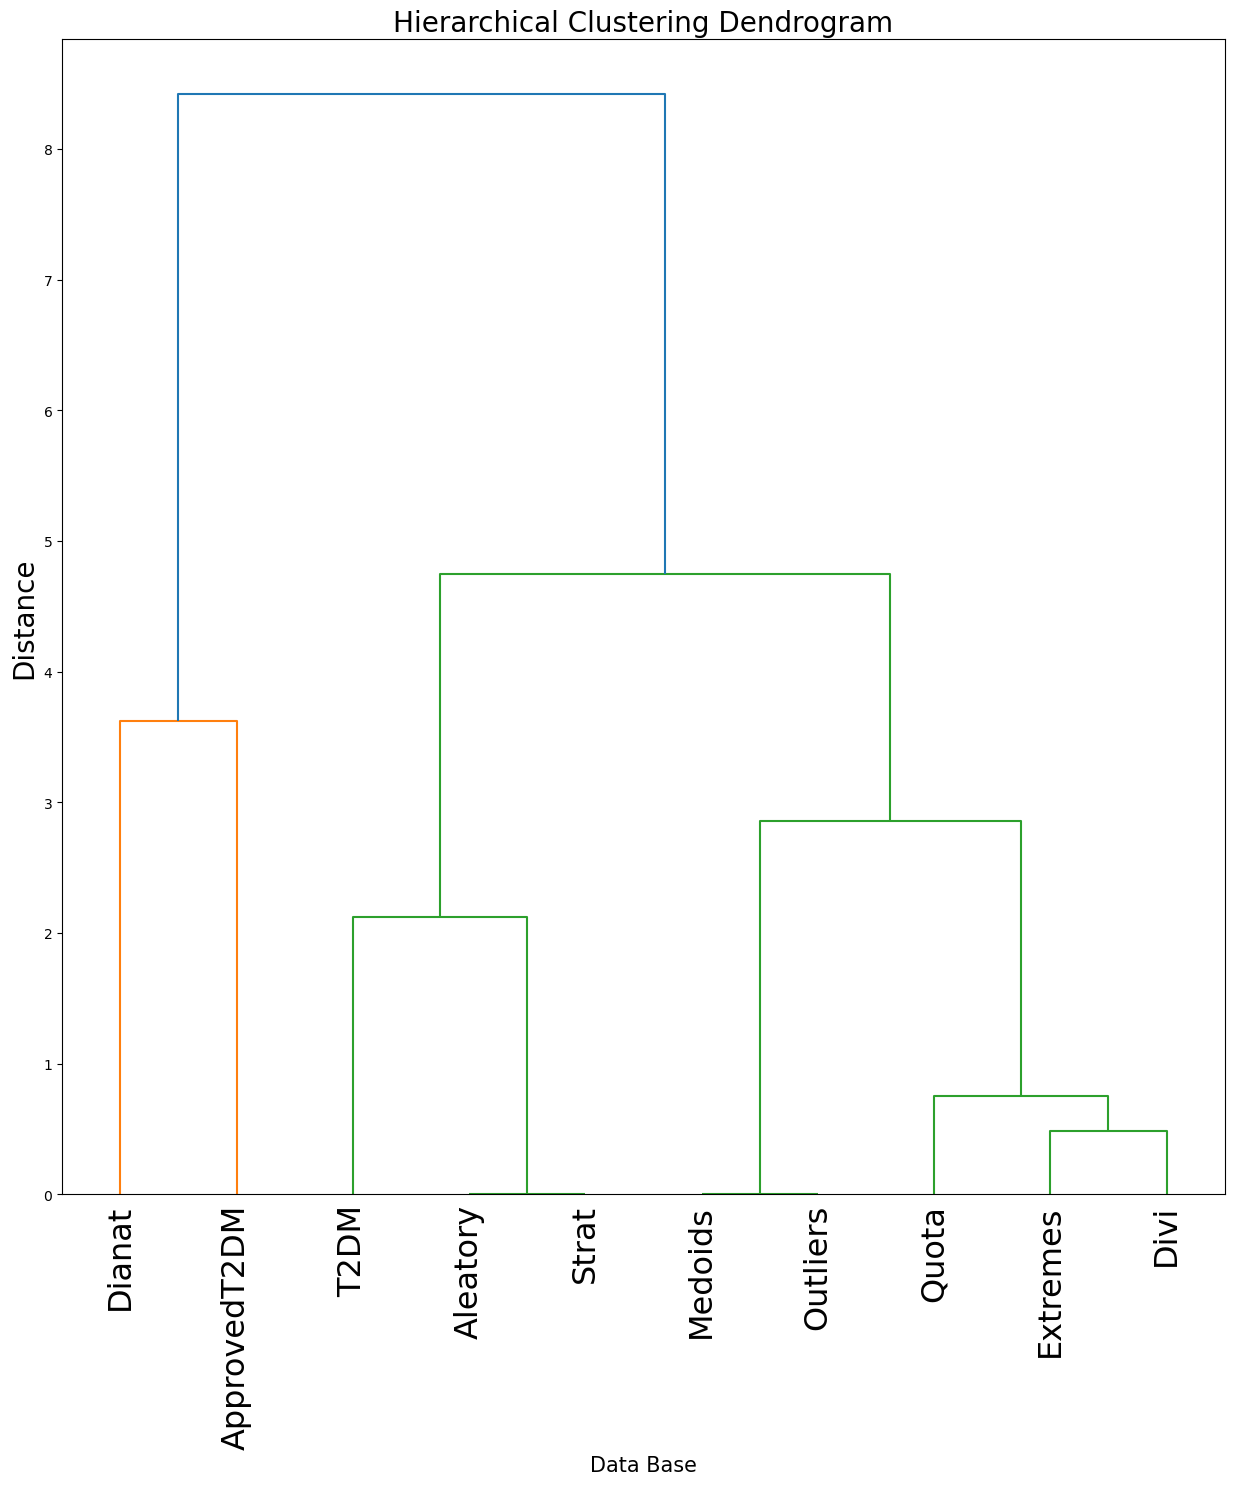

In [31]:
# Calcular la matriz de distancias y realizar el clustering jerárquico
Z = linkage(scaled_df, method='ward')

# Crear el dendrograma
plt.figure(figsize=(15, 15))
dendrogram(Z, labels=scaled_df.index, leaf_rotation=90., leaf_font_size=23)
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Data Base', fontsize=15)
plt.ylabel('Distance', fontsize=20)
plt.show()

## Colormap

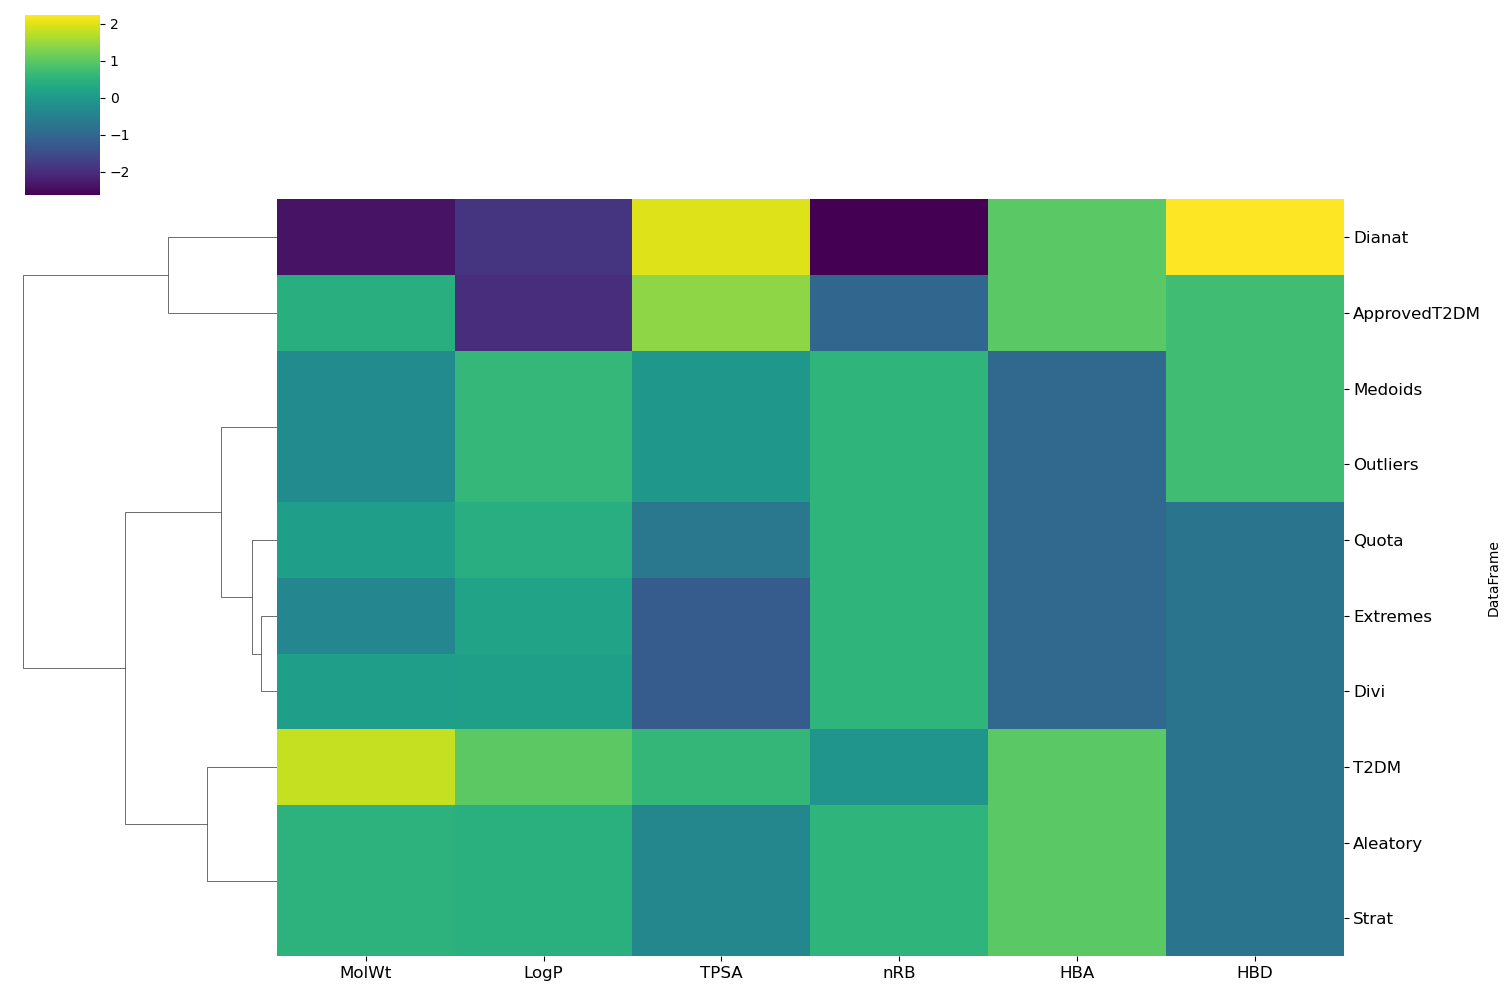

In [32]:

# Calcular la matriz de distancias
row_clusters = linkage(scaled_df.iloc[:, :-1], method='ward')

# Crear el heatmap con el dendrograma
g = sns.clustermap(scaled_df, row_cluster=True, col_cluster=False, row_linkage=row_clusters, cmap="viridis", figsize=(15, 10),
               )
g.ax_heatmap.tick_params(labelsize=12)  # Tamaño de las etiquetas del heatmap
g.ax_row_dendrogram.tick_params(labelsize=18)  # Tamaño de las etiquetas del dendrograma de filas
g.ax_col_dendrogram.tick_params(labelsize=18)
plt.show()


## Gráfico de radar

In [40]:
scaled_df


MolWt      LogP      TPSA       nRB       HBA       HBD     DataFrame
0 -0.332606  0.238905 -1.211907  0.575693 -0.894427 -0.811107      Extremes
1 -0.233123  0.637012 -0.082673  0.575693 -0.894427  0.648886       Medoids
2 -0.233123  0.637012 -0.082673  0.575693 -0.894427  0.648886      Outliers
3  0.122016  0.454218 -0.688439  0.575693 -0.894427 -0.811107         Quota
4  0.525033  0.496038 -0.406467  0.575693  1.118034 -0.811107         Strat
5 -2.245141 -1.748816  1.847280 -2.472092  1.118034  2.108878        Dianat
6  1.788208  1.021962  0.524443 -0.033864  1.118034 -0.811107          T2DM
7  0.486720 -1.885220  1.312344 -0.948200  1.118034  0.648886  ApprovedT2DM
8  0.122016  0.148889 -1.211907  0.575693 -0.894427 -0.811107          Divi

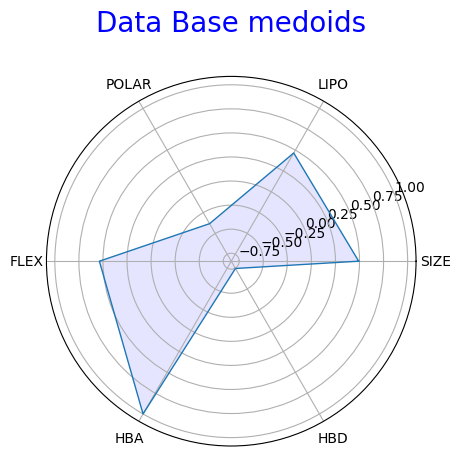

In [ ]:
# Función para crear un gráfico de radar
def plot_radar(scaled_df, row, title):
    categories = list(scaled_df.columns)  # No necesitamos excluir ninguna columna ahora
    values = scaled_df.loc[row].values.flatten().tolist()

    N = len(categories)

    # Repetir el primer valor al final para cerrar el círculo
    values += values[:1]

    # Calcular los ángulos para cada categoría
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Inicializar el gráfico de radar
    ax = plt.subplot(111, polar=True)

    # Dibuja una línea alrededor del círculo
    plt.xticks(angles[:-1], categories)

    # Dibuja los datos
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Rellena el área
    ax.fill(angles, values, 'b', alpha=0.1)

    # Añade el título
    plt.title(title, size=20, color='blue', y=1.1)

    plt.show()

# Ejemplo de uso
plot_radar(scaled_df, 'Strat', 'Data Base medoids')


In [ ]:
scaled_df

MolWt      LogP      TPSA       nRB  HBA       HBD
DataFrame                                                          
Extremes     -0.400443  0.197571 -1.224543  0.537319 -1.0 -0.745356
Medoids      -0.296993  0.612221 -0.043938  0.537319 -1.0  0.745356
Outliers     -0.296993  0.612221 -0.043938  0.537319 -1.0  0.745356
Quota         0.072305  0.421832 -0.677261  0.537319 -1.0 -0.745356
Strat         0.491390  0.465389 -0.382462  0.537319  1.0 -0.745356
Dianat       -2.389227 -1.872747  1.973811 -2.623379  1.0  2.236068
T2DM          1.804926  1.013168  0.590796 -0.094821  1.0 -0.745356
ApprovedT2DM  0.451549 -2.014819  1.414540 -1.043030  1.0  0.745356
Divi          0.072305  0.103815 -1.224543  0.537319 -1.0 -0.745356
Aleatory      0.491181  0.461349 -0.382462  0.537319  1.0 -0.745356

In [ ]:
df = scaled_df

In [ ]:
scaled_df = scaled_df.rename(columns={'MolWt': 'SIZE', 'LogP': 'LIPO', 'TPSA': 'POLAR', 'nRB': 'FLEX'})
df
scaled_df

SIZE      LIPO     POLAR      FLEX  HBA       HBD
DataFrame                                                          
Extremes     -0.400443  0.197571 -1.224543  0.537319 -1.0 -0.745356
Medoids      -0.296993  0.612221 -0.043938  0.537319 -1.0  0.745356
Outliers     -0.296993  0.612221 -0.043938  0.537319 -1.0  0.745356
Quota         0.072305  0.421832 -0.677261  0.537319 -1.0 -0.745356
Strat         0.491390  0.465389 -0.382462  0.537319  1.0 -0.745356
Dianat       -2.389227 -1.872747  1.973811 -2.623379  1.0  2.236068
T2DM          1.804926  1.013168  0.590796 -0.094821  1.0 -0.745356
ApprovedT2DM  0.451549 -2.014819  1.414540 -1.043030  1.0  0.745356
Divi          0.072305  0.103815 -1.224543  0.537319 -1.0 -0.745356
Aleatory      0.491181  0.461349 -0.382462  0.537319  1.0 -0.745356

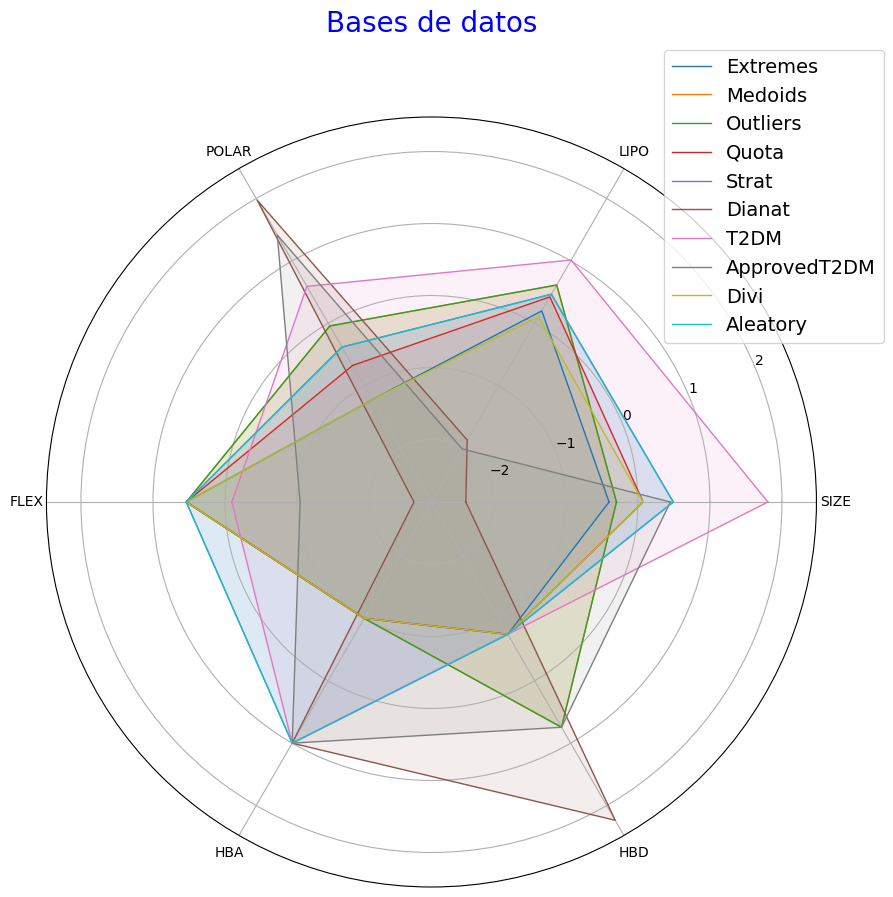

In [ ]:
def plot_radar_all(scaled_df, title):
    categories = list(scaled_df.columns)
    N = len(categories)

    # Calcula los ángulos para cada categoría
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Inicializa el gráfico de radar
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Dibuja una línea alrededor del círculo
    plt.xticks(angles[:-1], categories)

    # Dibuja los datos para cada fila del DataFrame
    for index, row in scaled_df.iterrows():
        values = row.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=index)
        ax.fill(angles, values, alpha=0.1)

    # Añade el título y la leyenda
    plt.title(title, size=20, color='blue', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), prop={'size': 14})

    plt.show()

# Ejemplo de uso
plot_radar_all(scaled_df, 'Bases de datos')

## Diagrama de arbol


prog='neato'
prog='dot'
prog='twopi'
‘dot’, ‘twopi’, ‘fdp’, ‘sfdp’, ‘circo’

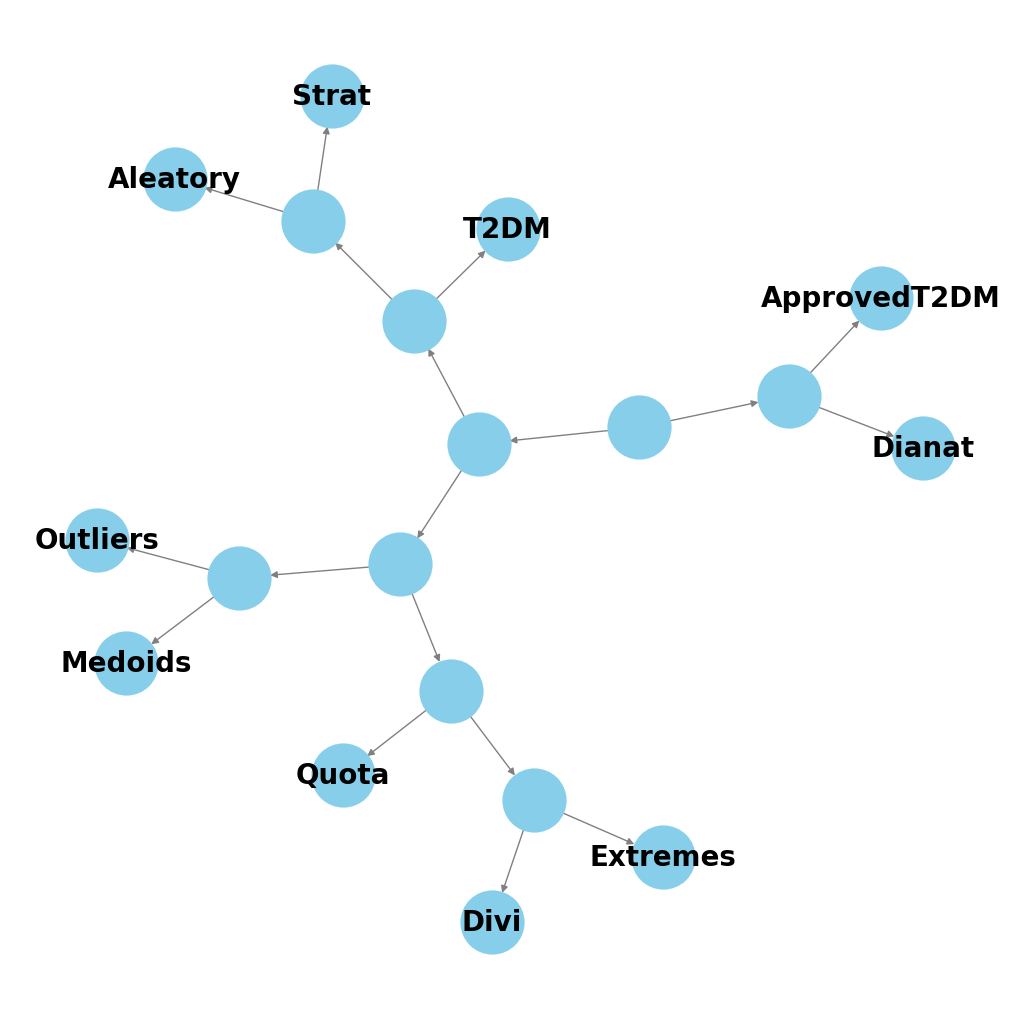

In [ ]:


# Calcular la matriz de distancias
Z = linkage(scaled_df, method='ward')

# Convertir la jerarquía a un formato de árbol
def build_tree(Z, labels):
    tree = nx.DiGraph()
    n = len(Z) + 1
    for i, (left, right, dist, _) in enumerate(Z):
        left, right = int(left), int(right)
        tree.add_node(n + i, label=str(n + i), distance=dist)
        tree.add_edge(n + i, left, weight=dist)
        tree.add_edge(n + i, right, weight=dist)
    for i, label in enumerate(labels):
        tree.add_node(i, label=label, distance=0)
    return tree

tree = build_tree(Z, scaled_df.index)

# Dibujar el árbol filogenético
pos = nx.drawing.nx_pydot.graphviz_layout(tree, prog='neato')

# Extraer etiquetas solo para las hojas
labels = {node: tree.nodes[node]['label'] if node < len(df.index) else '' for node in tree.nodes()}


plt.figure(figsize=(10, 10))
nx.draw(tree, pos, with_labels=True, labels=labels, node_size=2000, font_size=20,  node_color='skyblue', edge_color='gray', font_weight='bold', linewidths=1.5)
#plt.title('Árbol Filogenético')
plt.show()


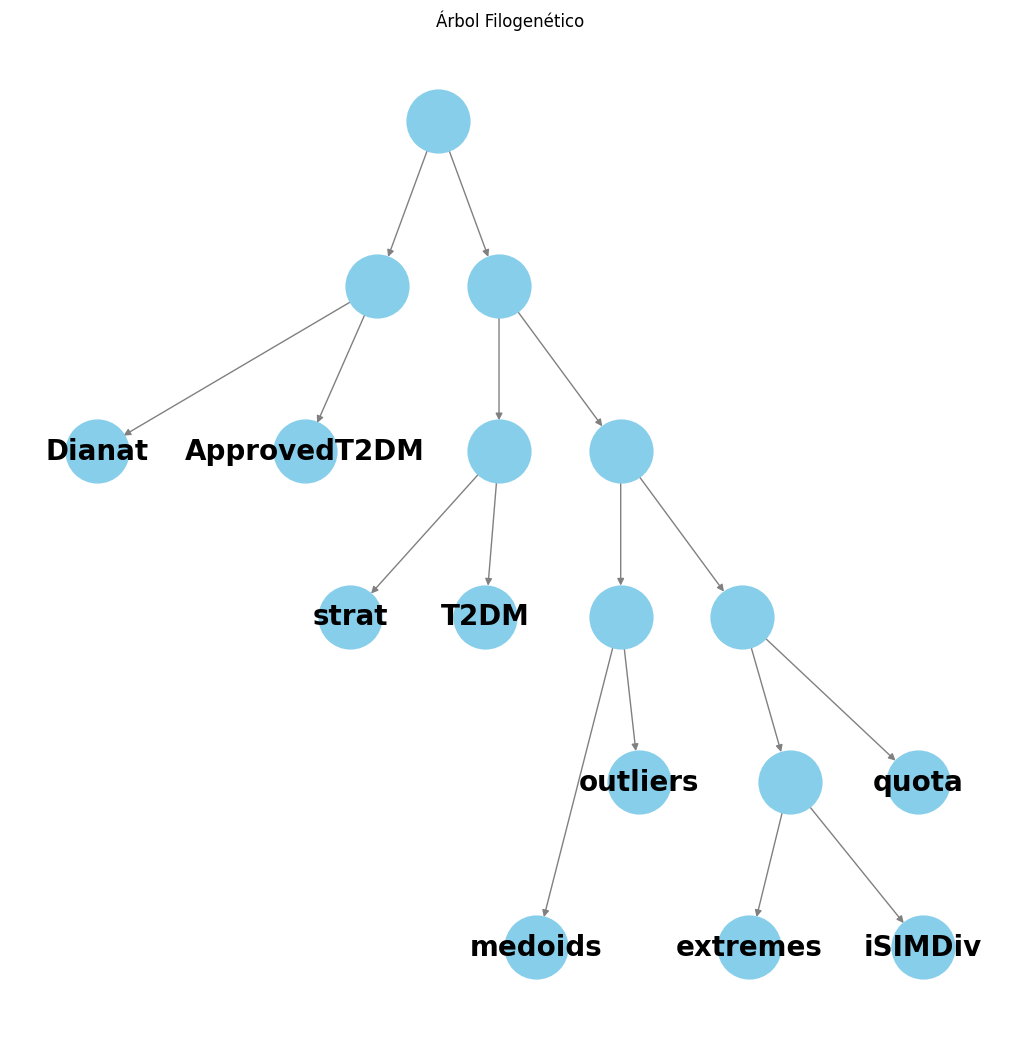

In [ ]:
pos = nx.drawing.nx_pydot.graphviz_layout(tree, prog='dot')

# Extraer etiquetas solo para las hojas
labels = {node: tree.nodes[node]['label'] if node < len(df.index) else '' for node in tree.nodes()}


plt.figure(figsize=(10, 10))
nx.draw(tree, pos, with_labels=True, labels=labels, node_size=2000, font_size=20,  node_color='skyblue', edge_color='gray', font_weight='bold', linewidths=1.5)
plt.title('Árbol Filogenético')
plt.show()

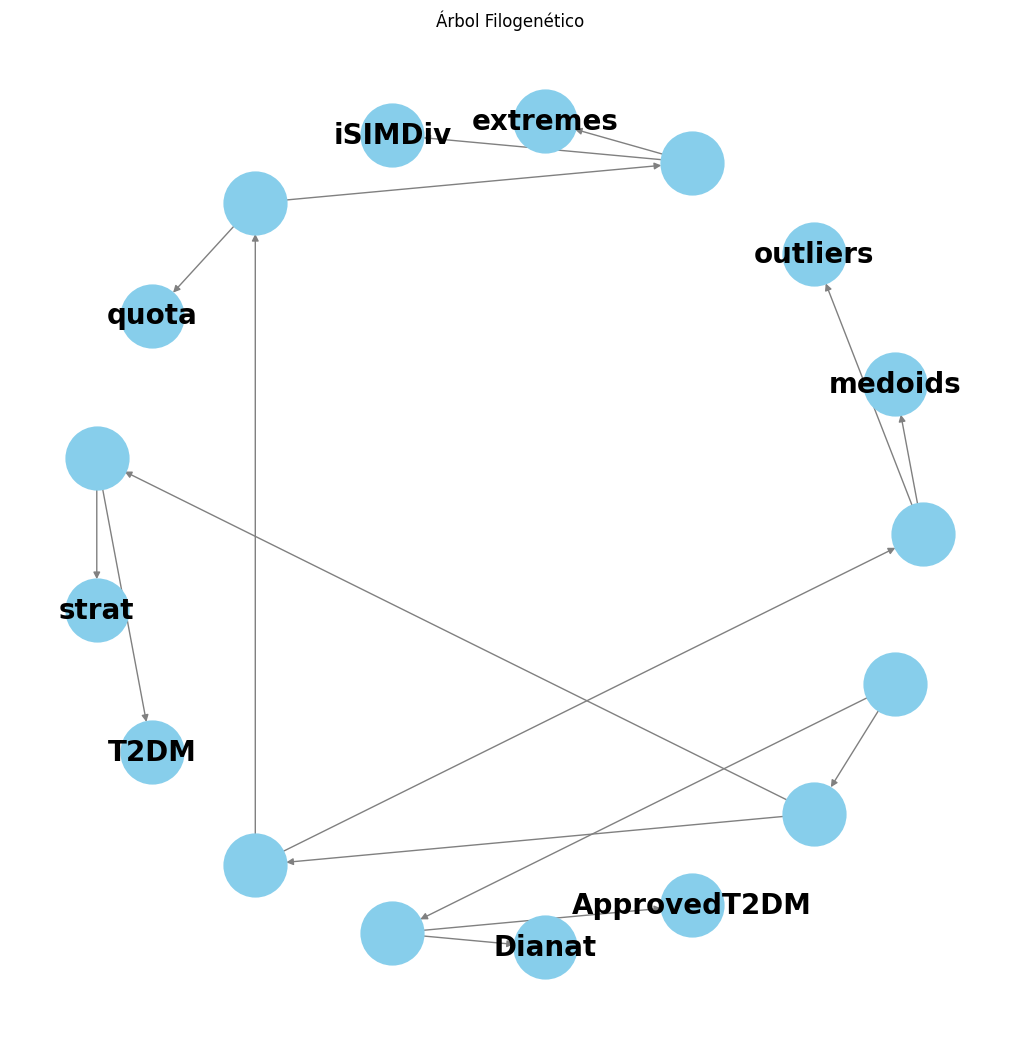

In [ ]:
pos = nx.circular_layout(tree)

# Extraer etiquetas solo para las hojas
labels = {node: tree.nodes[node]['label'] if node < len(df.index) else '' for node in tree.nodes()}


plt.figure(figsize=(10, 10))
nx.draw(tree, pos, with_labels=True, labels=labels, node_size=2000, font_size=20,  node_color='skyblue', edge_color='gray', font_weight='bold', linewidths=1.5)
plt.title('Árbol Filogenético')
plt.show()

## PCA y Kmeans


In [ ]:
scaled_df

SIZE      LIPO     POLAR      FLEX       HBA       HBD
DataFrame                                                               
extremes     -0.332606  0.238905 -1.211907  0.575693 -0.894427 -0.811107
medoids      -0.233123  0.637012 -0.082673  0.575693 -0.894427  0.648886
outliers     -0.233123  0.637012 -0.082673  0.575693 -0.894427  0.648886
quota         0.122016  0.454218 -0.688439  0.575693 -0.894427 -0.811107
strat         0.525033  0.496038 -0.406467  0.575693  1.118034 -0.811107
Dianat       -2.245141 -1.748816  1.847280 -2.472092  1.118034  2.108878
T2DM          1.788208  1.021962  0.524443 -0.033864  1.118034 -0.811107
ApprovedT2DM  0.486720 -1.885220  1.312344 -0.948200  1.118034  0.648886
iSIMDiv       0.122016  0.148889 -1.211907  0.575693 -0.894427 -0.811107

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data_pca = scaled_df.copy()
#data_pca = data_pca.drop(labels = ['DataBase'],axis = 1)
#What StandardScaler() does is scaling the data. The fit.transform() module fits these new values to the data,
#and stores them, replacing the old values.
data_pca = StandardScaler().fit_transform(data_pca)
#Apply PCA on the transformed (scaled and centered) data:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data_pca)
pca_results

array([[ 1.45815232, -0.88830873],
       [ 0.51408483, -0.94948316],
       [ 0.51408483, -0.94948316],
       [ 1.44964293, -0.45112484],
       [ 0.84693572,  1.18958644],
       [-4.72272908, -0.82160039],
       [ 0.73549626,  2.30389018],
       [-2.35086646,  1.161724  ],
       [ 1.55519866, -0.59520035]])

In [ ]:
pca_df = pd.DataFrame(pca_results, index=scaled_df.index, columns=['PC1', 'PC2'])
pca_df

PC1       PC2
DataFrame                       
extremes      1.458152 -0.888309
medoids       0.514085 -0.949483
outliers      0.514085 -0.949483
quota         1.449643 -0.451125
strat         0.846936  1.189586
Dianat       -4.722729 -0.821600
T2DM          0.735496  2.303890
ApprovedT2DM -2.350866  1.161724
iSIMDiv       1.555199 -0.595200

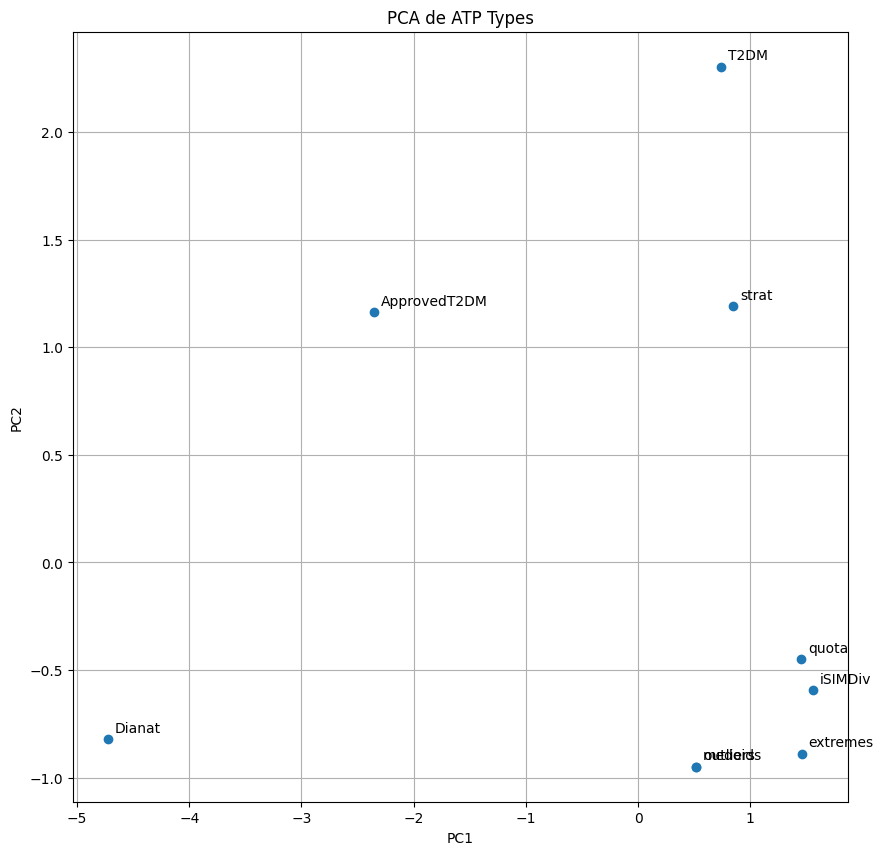

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(10, 10))
plt.scatter(pca_df['PC1'], pca_df['PC2'])

# Añadir etiquetas
for label, x, y in zip(pca_df.index, pca_df['PC1'], pca_df['PC2']):
    plt.annotate(label, xy=(x, y), xytext=(5, 5), textcoords='offset points')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA de ATP Types')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

# Aplicar K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
caled_df.index = kmeans.labels_

# Visualizar los clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='0', y='1', hue='Cluster', data=caled_df, palette='viridis')
plt.title('K-means Clustering')
plt.show()


NameError: name 'caled_df' is not defined

## Extra

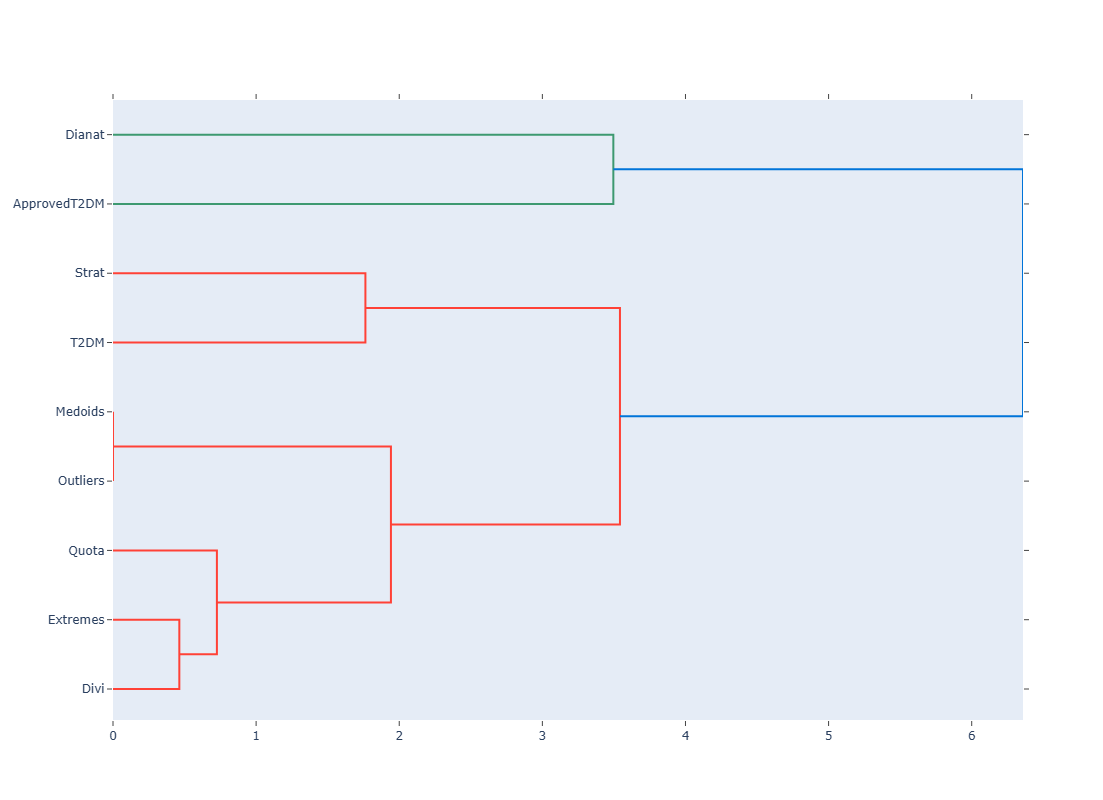

In [32]:
import plotly.figure_factory as ff

fig = ff.create_dendrogram(scaled_df.values, labels=scaled_df.index, orientation='left')
fig.update_layout(width=800, height=800)
fig.show()

In [33]:
df1 = scaled_df.copy()

In [34]:
color_dict = {
    'divi': '#9467bd',         # Púrpura
    'Aleatory': '#8c564b',   # Rojo marrón
    'Extremes': '#ff7f0e',       # Naranja
    'Medoids': '#a6761d',         # Marrón dorado (evita conflicto)
    'Outlier': '#1f77b4',       # Azul oscuro
    'Quota': '#e7298a',          # Rosa intenso
    'Strat': '#2ca02c',      # Verde
    'Dianat': '#1b9e77',       # Verde pino
    'T2DM': '#d98880',        # Rosa Viejo (Opción 5) ###
    'ApprovedT2DM': '#d62728'   # Rojo
}

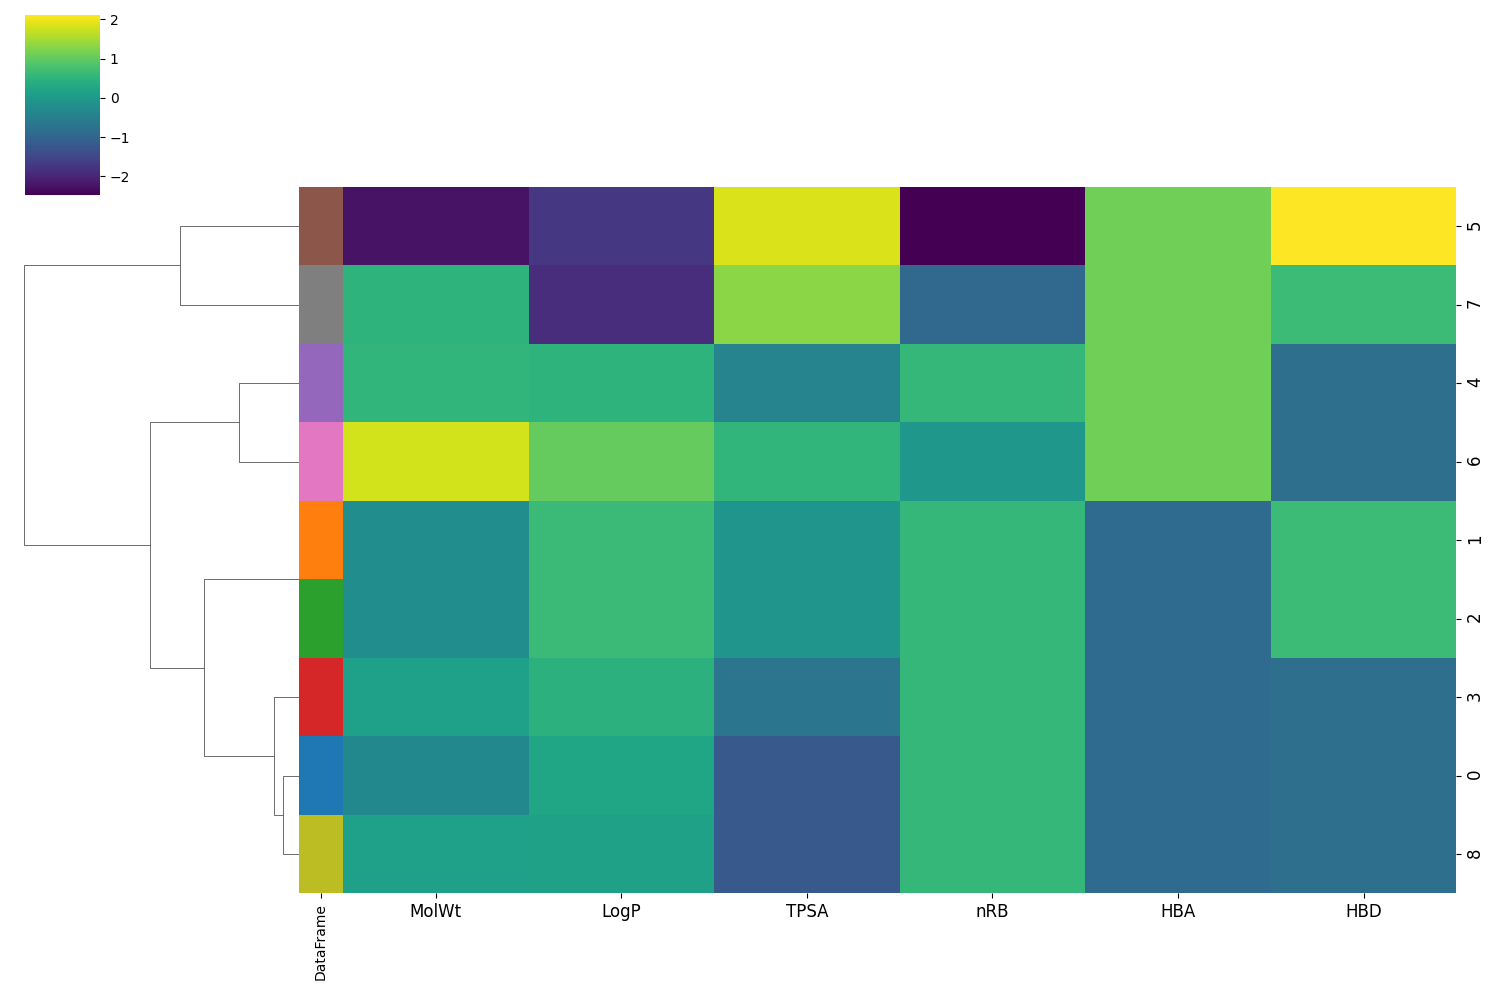

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# Calcula la matriz de distancias con el método Ward
row_clusters = linkage(scaled_df.iloc[:, :-1], method='ward')

# Paleta de colores específica para cada categoría
category_colors = {
    'Extremes': '#1f77b4',   # Azul
    'Medoids': '#ff7f0e',    # Naranja
    'Outliers': '#2ca02c',   # Verde
    'Quota': '#d62728',      # Rojo
    'Strat': '#9467bd',      # Púrpura
    'Dianat': '#8c564b',     # Marrón
    'T2DM': '#e377c2',       # Rosa
    'ApprovedT2DM': '#7f7f7f', # Gris
    'iSIMDiv': '#bcbd22'     # Amarillo
}

# Mapeo de colores por categoría en el DataFrame
row_colors = scaled_df['DataFrame'].map(category_colors)

# Creación del heatmap con dendrograma y mapa de colores
g = sns.clustermap(
    scaled_df.iloc[:, :-1],   # Excluir la columna de categorías
    row_cluster=True,
    col_cluster=False,
    row_linkage=row_clusters,
    cmap="viridis",
    figsize=(15, 10),
    row_colors=row_colors,   # Barra lateral de colores según categoría
)

# Ajuste de etiquetas y tamaño de fuente
g.ax_heatmap.tick_params(labelsize=12)  # Tamaño etiquetas del heatmap
g.ax_row_dendrogram.tick_params(labelsize=14)  # Tamaño etiquetas dendrograma de filas
g.ax_col_dendrogram.tick_params(labelsize=14)

# Mostrar el gráfico
plt.show()


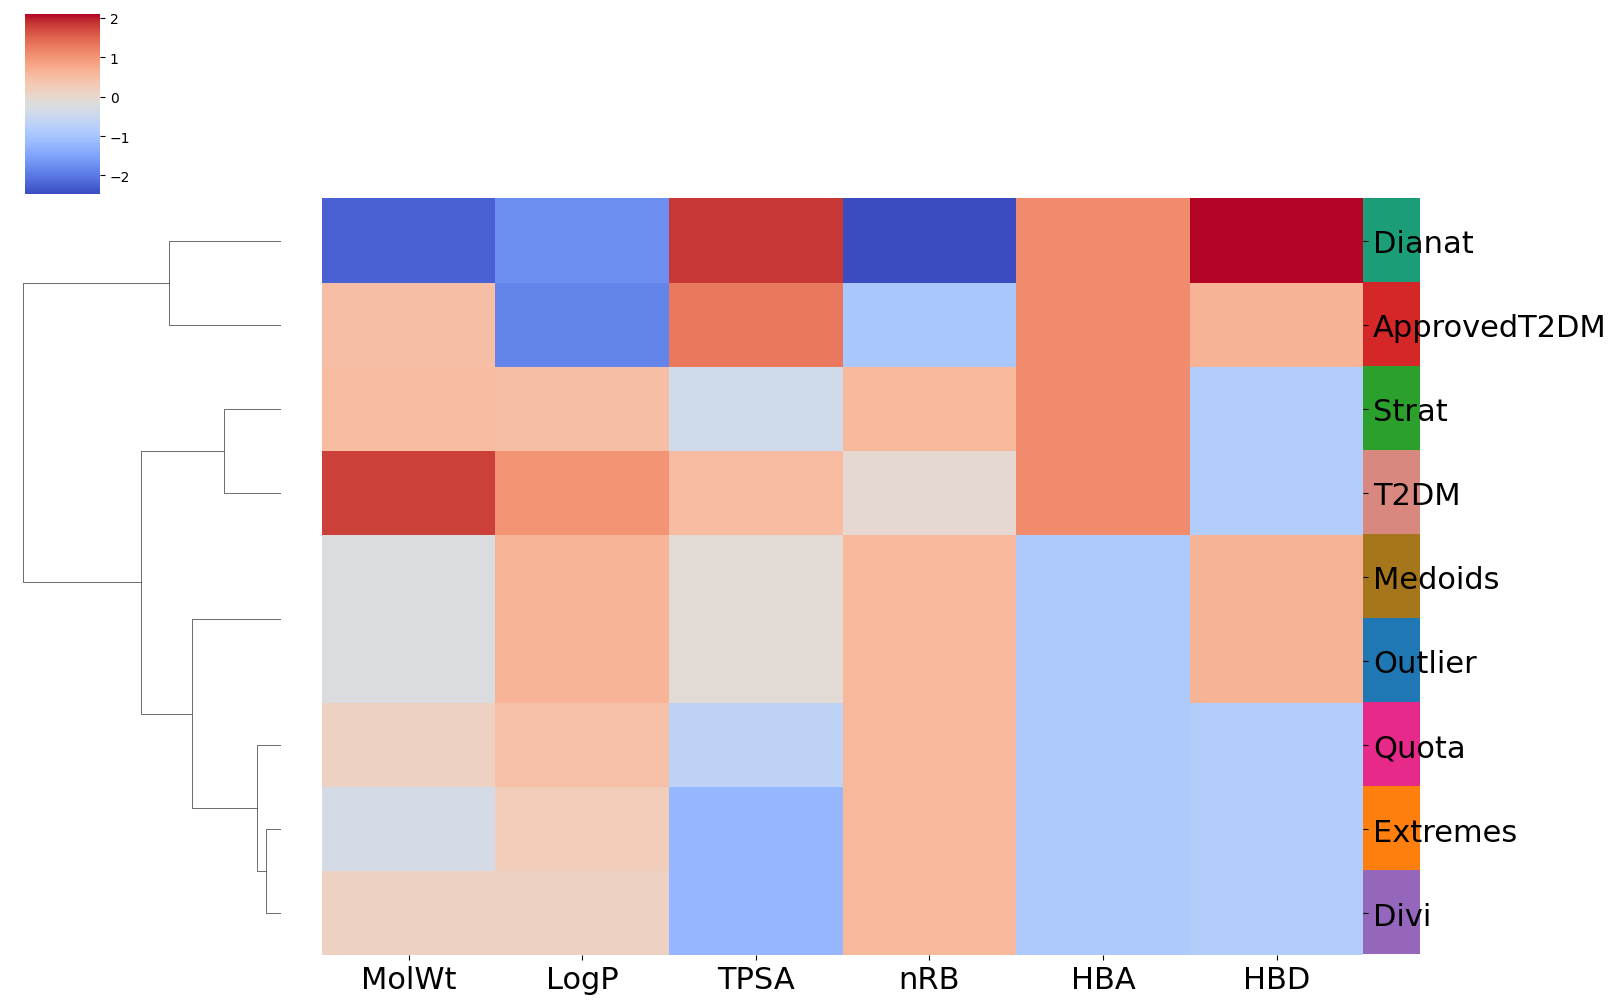

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
import pandas as pd

# Configura los datos de ejemplo (si ya tienes scaled_df, omite esta parte)
scaled_df = pd.DataFrame({
    'MolWt': [-0.33, -0.23, -0.23, 0.12, 0.52, -2.24, 1.78, 0.48, 0.12],
    'LogP': [0.23, 0.63, 0.63, 0.45, 0.49, -1.74, 1.02, -1.88, 0.14],
    'TPSA': [-1.21, -0.08, -0.08, -0.68, -0.40, 1.84, 0.52, 1.31, -1.21],
    'nRB': [0.57, 0.57, 0.57, 0.57, 0.57, -2.47, -0.03, -0.94, 0.57],
    'HBA': [-0.89, -0.89, -0.89, -0.89, 1.11, 1.11, 1.11, 1.11, -0.89],
    'HBD': [-0.81, 0.64, 0.64, -0.81, -0.81, 2.10, -0.81, 0.64, -0.81]
}, index=['Extremes', 'Medoids', 'Outlier', 'Quota', 'Strat', 'Dianat', 'T2DM', 'ApprovedT2DM', 'Divi'])

# Paleta de colores específica para cada categoría
color_dict = {
    'Extremes': '#ff7f0e',      # Naranja
    'Medoids': '#a6761d',       # Marrón dorado
    'Outlier': '#1f77b4',      # Azul oscuro
    'Quota': '#e7298a',         # Rosa intenso
    'Strat': '#2ca02c',         # Verde
    'Dianat': '#1b9e77',        # Marrón
    'T2DM': '#d98880',          # Rosa Viejo
    'ApprovedT2DM': '#d62728',  # Rojo
    'Divi': '#9467bd'           # Púrpura
}

# Mapeo de colores por categoría en el DataFrame
row_colors = scaled_df.index.map(color_dict)

# Calcula la matriz de distancias con el método Ward
row_clusters = linkage(scaled_df, method='ward')

# Crear el heatmap con dendrograma y barra de colores para cada categoría
g = sns.clustermap(
    scaled_df,
    row_cluster=True,
    col_cluster=False,
    row_linkage=row_clusters,
    cmap="coolwarm",
    figsize=(15, 10),
    row_colors=row_colors,   # Barra lateral de colores según categoría
)


# Mover la barra de colores al lado derecho
g.ax_row_colors.set_position([0.9, 0.04, 0.05, 0.756])  # Ajusta la posición de la barra de colores

# Personalizar etiquetas
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=22)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=22)

# Eliminar la leyenda
#g.ax_heatmap.legend_.remove()

# Mostrar el gráfico
plt.show()


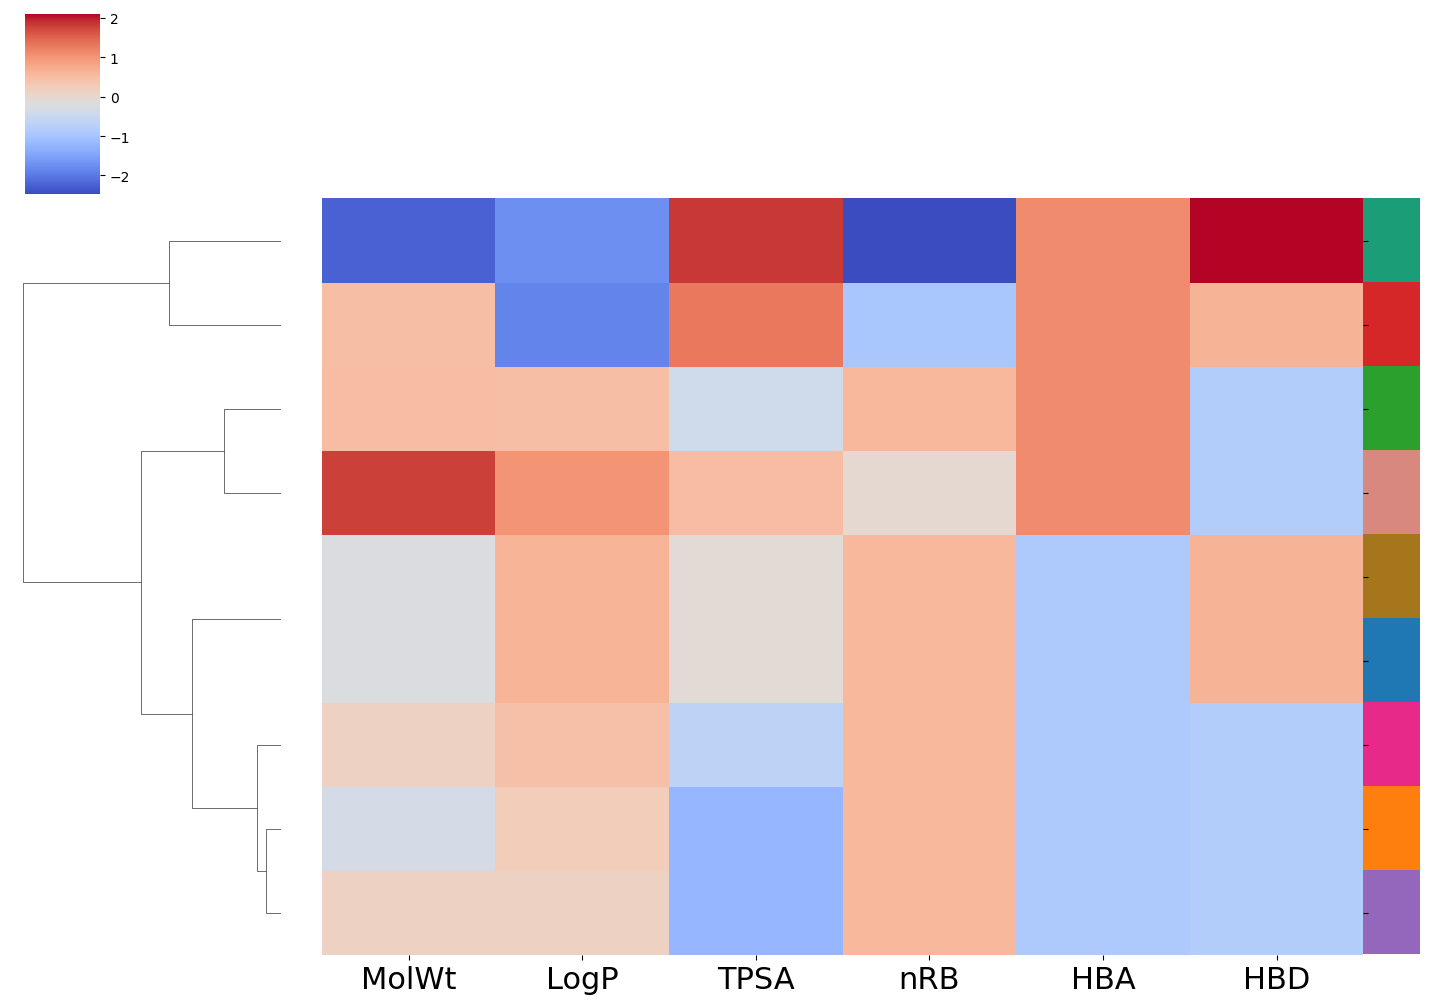

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
import pandas as pd

# Configura los datos de ejemplo (si ya tienes scaled_df, omite esta parte)
scaled_df = pd.DataFrame({
    'MolWt': [-0.33, -0.23, -0.23, 0.12, 0.52, -2.24, 1.78, 0.48, 0.12],
    'LogP': [0.23, 0.63, 0.63, 0.45, 0.49, -1.74, 1.02, -1.88, 0.14],
    'TPSA': [-1.21, -0.08, -0.08, -0.68, -0.40, 1.84, 0.52, 1.31, -1.21],
    'nRB': [0.57, 0.57, 0.57, 0.57, 0.57, -2.47, -0.03, -0.94, 0.57],
    'HBA': [-0.89, -0.89, -0.89, -0.89, 1.11, 1.11, 1.11, 1.11, -0.89],
    'HBD': [-0.81, 0.64, 0.64, -0.81, -0.81, 2.10, -0.81, 0.64, -0.81]
}, index=['Extremes', 'Medoids', 'Outlier', 'Quota', 'Strat', 'Dianat', 'T2DM', 'ApprovedT2DM', 'Divi'])

# Paleta de colores específica para cada categoría
color_dict = {
    'Extremes': '#ff7f0e',      # Naranja
    'Medoids': '#a6761d',       # Marrón dorado
    'Outlier': '#1f77b4',      # Azul oscuro
    'Quota': '#e7298a',         # Rosa intenso
    'Strat': '#2ca02c',         # Verde
    'Dianat': '#1b9e77',        # Marrón
    'T2DM': '#d98880',          # Rosa Viejo
    'ApprovedT2DM': '#d62728',  # Rojo
    'Divi': '#9467bd'           # Púrpura
}

# Mapeo de colores por categoría en el DataFrame
row_colors = scaled_df.index.map(color_dict)

# Calcula la matriz de distancias con el método Ward
row_clusters = linkage(scaled_df, method='ward')

# Crear el heatmap con dendrograma y barra de colores para cada categoría
g = sns.clustermap(
    scaled_df,
    row_cluster=True,
    col_cluster=False,
    row_linkage=row_clusters,
    cmap="coolwarm",
    figsize=(15, 10),
    row_colors=row_colors,   # Barra lateral de colores según categoría
)

# Mover la barra de colores al lado derecho
g.ax_row_colors.set_position([0.9, 0.04, 0.05, 0.756])  # Ajusta la posición de la barra de colores

# Eliminar los nombres de las filas
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=22)
g.ax_heatmap.set_yticklabels([])

# Mostrar el gráfico
plt.show()


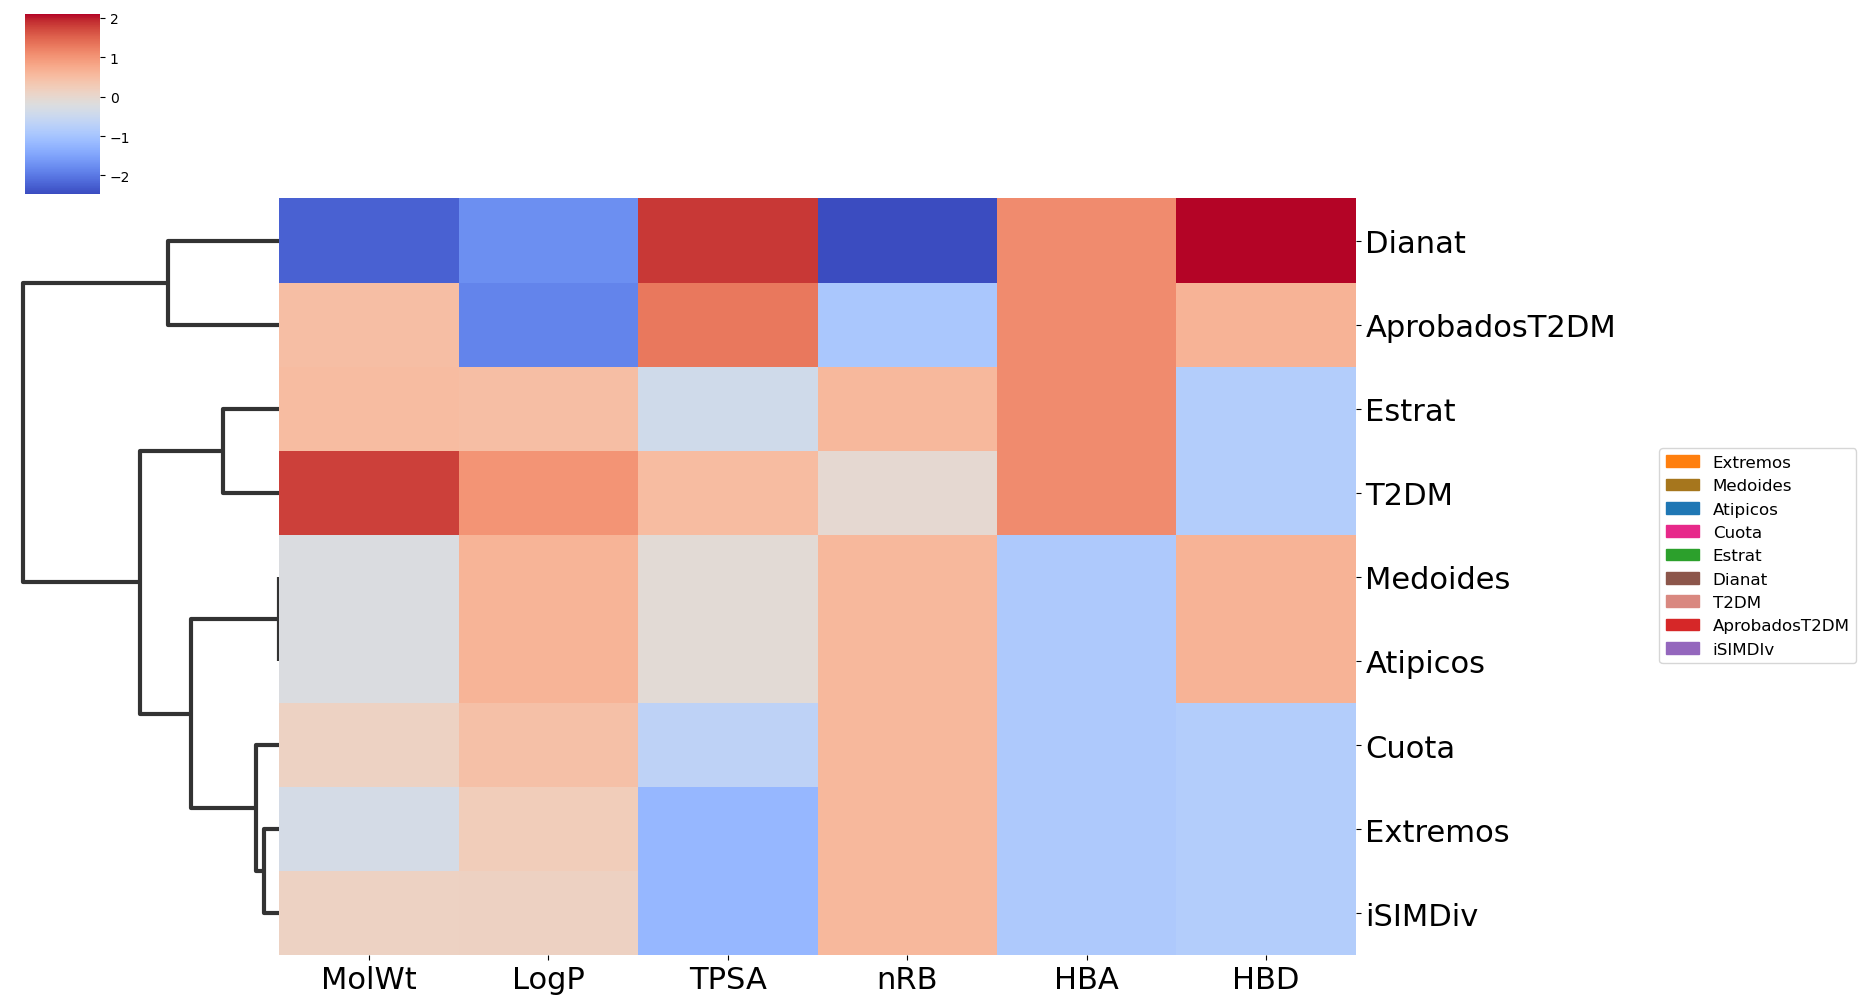

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
import pandas as pd

# Configura los datos de ejemplo (si ya tienes scaled_df, omite esta parte)
scaled_df = pd.DataFrame({
    'MolWt': [-0.33, -0.23, -0.23, 0.12, 0.52, -2.24, 1.78, 0.48, 0.12],
    'LogP': [0.23, 0.63, 0.63, 0.45, 0.49, -1.74, 1.02, -1.88, 0.14],
    'TPSA': [-1.21, -0.08, -0.08, -0.68, -0.40, 1.84, 0.52, 1.31, -1.21],
    'nRB': [0.57, 0.57, 0.57, 0.57, 0.57, -2.47, -0.03, -0.94, 0.57],
    'HBA': [-0.89, -0.89, -0.89, -0.89, 1.11, 1.11, 1.11, 1.11, -0.89],
    'HBD': [-0.81, 0.64, 0.64, -0.81, -0.81, 2.10, -0.81, 0.64, -0.81]
}, index=['Extremos', 'Medoides', 'Atipicos', 'Cuota', 'Estrat', 'Dianat', 'T2DM', 'AprobadosT2DM', 'iSIMDiv'])

# Paleta de colores específica para cada categoría
color_dict = {
    'Extremos': '#ff7f0e',      # Naranja
    'Medoides': '#a6761d',       # Marrón dorado
    'Atipicos': '#1f77b4',      # Azul oscuro
    'Cuota': '#e7298a',         # Rosa intenso
    'Estrat': '#2ca02c',         # Verde
    'Dianat': '#8c564b',   # Rojo marrón
    'T2DM': '#d98880',          # Rosa Viejo
    'AprobadosT2DM': '#d62728',  # Rojo
    'iSIMDIv': '#9467bd'           # Púrpura
}



# Mapeo de colores por categoría en el DataFrame
row_colors = scaled_df.index.map(color_dict)

# Calcula la matriz de distancias con el método Ward
row_clusters = linkage(scaled_df, method='ward')

# Crear el heatmap con dendrograma y barra de colores para cada categoría
g = sns.clustermap(
    scaled_df,
    row_cluster=True,
    col_cluster=False,
    row_linkage=row_clusters,
    cmap="coolwarm",
    figsize=(15, 10),
    #row_colors=row_colors,   # Barra lateral de colores según categoría
)

# Aumentar el grosor de las líneas del dendrograma
for line in g.ax_row_dendrogram.collections:
    line.set_linewidth(3)  # Cambia el valor para ajustar el grosor de las línea

# Personalizar etiquetas
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=22)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=22)

# Crear la leyenda personalizada
import matplotlib.patches as mpatches

legend_patches = [mpatches.Patch(color=color, label=label) for label, color in color_dict.items()]
g.ax_heatmap.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=15., fontsize=12)

# Mostrar el gráfico
plt.show()


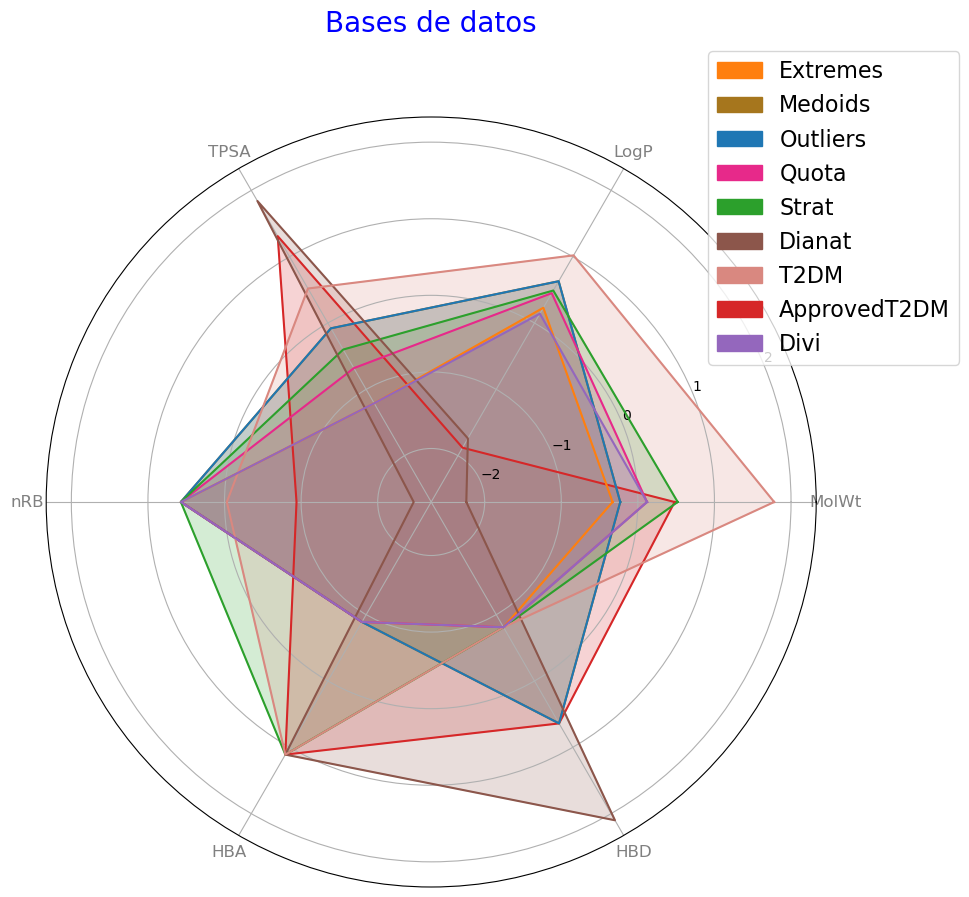

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_radar_all(scaled_df, title):
    # Ordena el DataFrame para que 'ApprovedT2DM' aparezca primero
    scaled_df = pd.concat([scaled_df[scaled_df['DataFrame'] == 'ApprovedT2DM'], scaled_df[scaled_df['DataFrame'] != 'ApprovedT2DM']])

    categories = list(scaled_df.columns[:-1])  # Excluye la columna de categorías
    N = len(categories)

    # Calcula los ángulos para cada categoría
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Paleta de colores específica para cada categoría
    category_colors = {
    'Extremes': '#ff7f0e',      # Naranja
    'Medoids': '#a6761d',       # Marrón dorado
    'Outlier': '#1f77b4',      # Azul oscuro
    'Outliers': '#1f77b4',      # Azul oscuro ###
    'Quota': '#e7298a',         # Rosa intenso
    'Strat': '#2ca02c',         # Verde
    'Dianat': '#8c564b',   # Rojo marrón
    'T2DM': '#d98880',          # Rosa Viejo
    'ApprovedT2DM': '#d62728',  # Rojo
    'Divi': '#9467bd'           # Púrpura
}

    # Inicializa el gráfico de radar
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    plt.xticks(angles[:-1], categories, color='grey', size=12)

    # Dibuja los datos para cada fila en el DataFrame
    for index, row in scaled_df.iterrows():
        label = row['DataFrame']
        color = category_colors.get(label, '#333333')  # Color específico o gris por defecto
        values = row.drop('DataFrame').values.flatten().tolist()
        values += values[:1]

        # Dibuja las líneas y áreas
        ax.plot(angles, values, linewidth=1.5, linestyle='solid', label=label, color=color)
        ax.fill(angles, values, color=color, alpha=0.2)

    # Añade el título y la leyenda
    plt.title(title, size=20, color='blue', y=1.1)

    # Crear la leyenda personalizada
    import matplotlib.patches as mpatches
    legend_patches = [mpatches.Patch(color=color, label=label) for label, color in category_colors.items() if label in scaled_df['DataFrame'].values]
    plt.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(1.2, 1.1), prop={'size': 16})

    plt.show()

# Ejemplo de uso con un DataFrame de ejemplo
data = {
    'MolWt': [-0.33, -0.23, -0.23, 0.12, 0.52, -2.24, 1.78, 0.48, 0.12],
    'LogP': [0.23, 0.63, 0.63, 0.45, 0.49, -1.74, 1.02, -1.88, 0.14],
    'TPSA': [-1.21, -0.08, -0.08, -0.68, -0.40, 1.84, 0.52, 1.31, -1.21],
    'nRB': [0.57, 0.57, 0.57, 0.57, 0.57, -2.47, -0.03, -0.94, 0.57],
    'HBA': [-0.89, -0.89, -0.89, -0.89, 1.11, 1.11, 1.11, 1.11, -0.89],
    'HBD': [-0.81, 0.64, 0.64, -0.81, -0.81, 2.10, -0.81, 0.64, -0.81],
    'DataFrame': ['Extremes', 'Medoids', 'Outliers', 'Quota', 'Strat', 'Dianat', 'T2DM', 'ApprovedT2DM', 'Divi']
}
scaled_df = pd.DataFrame(data)

plot_radar_all(scaled_df, 'Bases de datos')


In [46]:
def plot_radar_all(scaled_df, title, selected_rows=None):
    # Si se pasan filas específicas, filtra el DataFrame
    if selected_rows is not None:
        scaled_df = scaled_df[scaled_df['DataFrame'].isin(selected_rows)]

    # Ordena el DataFrame para que 'ApprovedT2DM' aparezca primero si está presente
    if 'ApprovedT2DM' in scaled_df['DataFrame'].values:
        scaled_df = pd.concat([scaled_df[scaled_df['DataFrame'] == 'ApprovedT2DM'],
                               scaled_df[scaled_df['DataFrame'] != 'ApprovedT2DM']])

    categories = list(scaled_df.columns[:-1])  # Excluye la columna 'DataFrame'
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    category_colors = {
        'Extremes': '#ff7f0e',
        'Medoids': '#a6761d',
  #      'Outlier': '#1f77b4',
        'Outliers': '#1f77b4',
        'Quota': '#e7298a',
        'Strat': '#2ca02c',
        'Dianat': '#8c564b',
        'T2DM': '#d98880',
        'ApprovedT2DM': '#d62728',
        'Divi': '#9467bd'
    }

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    plt.xticks(angles[:-1], categories, color='grey', size=12)

    for index, row in scaled_df.iterrows():
        label = row['DataFrame']
        color = category_colors.get(label, '#333333')
        values = row.drop('DataFrame').values.flatten().tolist()
        values += values[:1]

        ax.plot(angles, values, linewidth=1.5, linestyle='solid', label=label, color=color)
        ax.fill(angles, values, color=color, alpha=0.2)

    plt.title(title, size=20, color='blue', y=1.1)

    import matplotlib.patches as mpatches
    legend_patches = [mpatches.Patch(color=color, label=label)
                      for label, color in category_colors.items()
                      if label in scaled_df['DataFrame'].values]
    plt.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(1.2, 1.1), prop={'size': 16})

    plt.show()


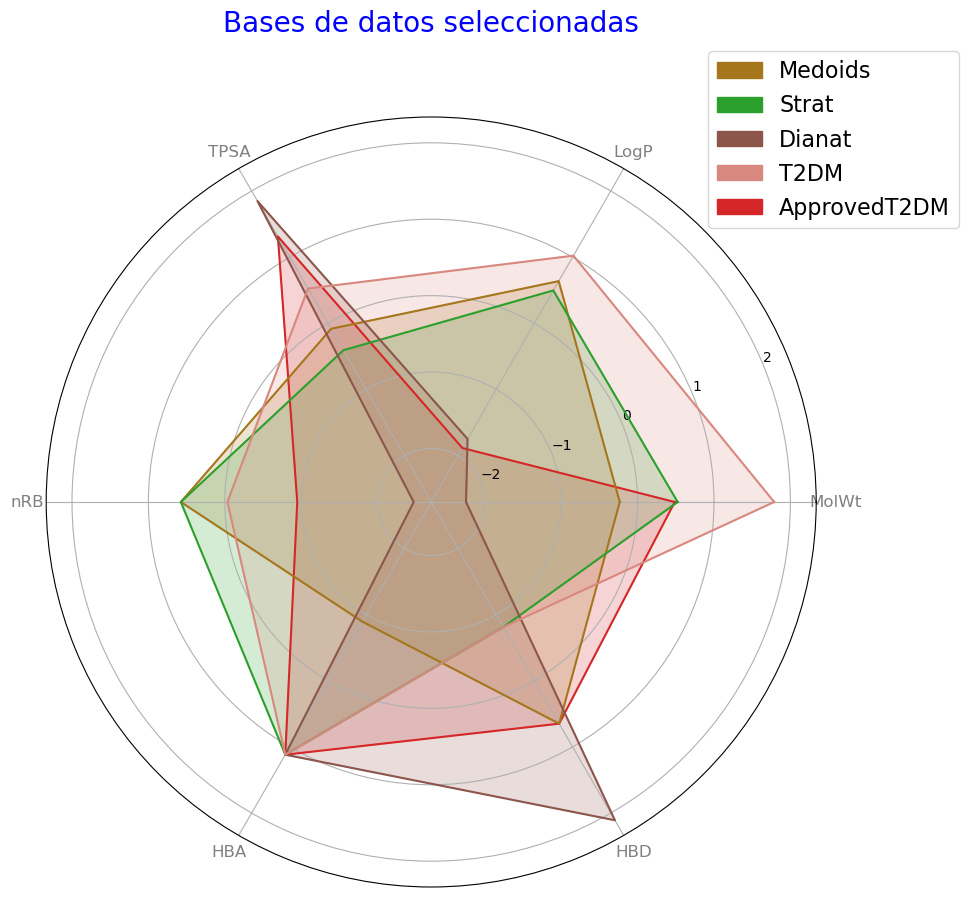

In [53]:
# Solo graficar ApprovedT2DM, T2DM y Dianat
selected_datasets = ['ApprovedT2DM', 'T2DM', 'Dianat', 'Strat', 'Medoids', 'Outlierls']
plot_radar_all(scaled_df, 'Bases de datos seleccionadas', selected_rows=selected_datasets)


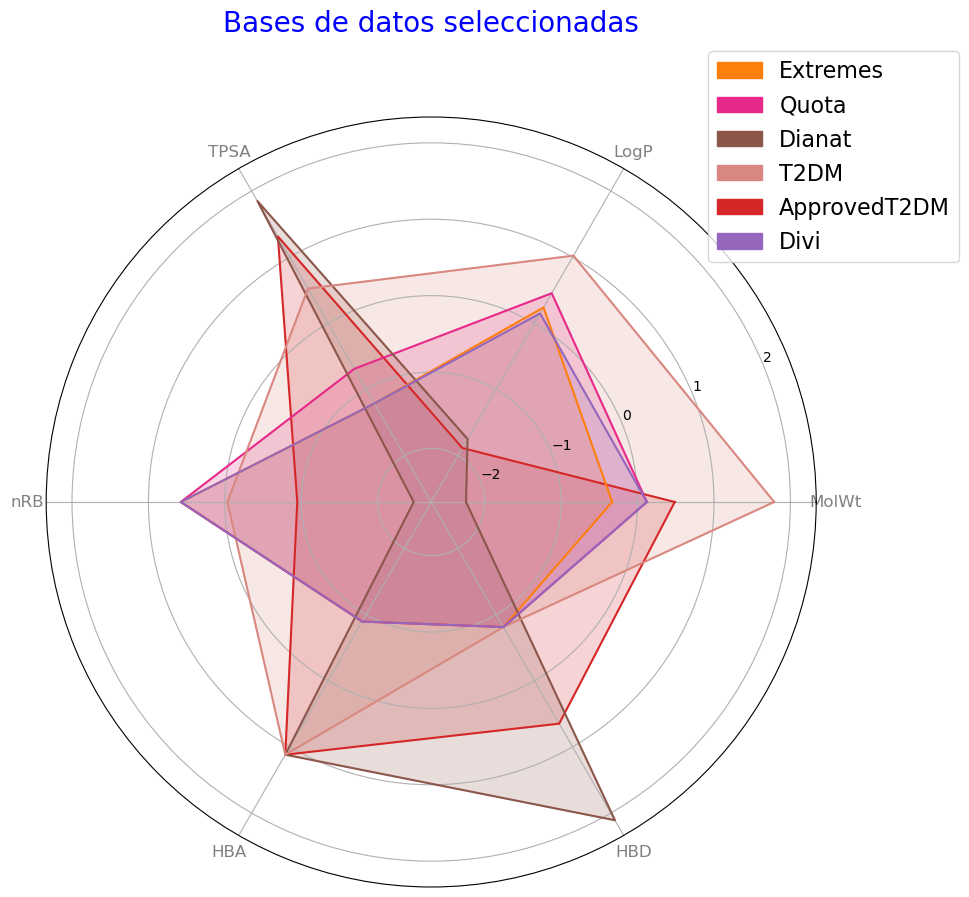

In [49]:
# Solo graficar ApprovedT2DM, T2DM y Dianat
selected_datasets = ['ApprovedT2DM', 'T2DM', 'Dianat', 'Divi', 'Extremes', 'Quota']
plot_radar_all(scaled_df, 'Bases de datos seleccionadas', selected_rows=selected_datasets)


In [42]:
def plot_radar_all(scaled_df, title, selected_columns=None):
    # Ordena el DataFrame para que 'ApprovedT2DM' aparezca primero
    scaled_df = pd.concat([scaled_df[scaled_df['DataFrame'] == 'ApprovedT2DM'],
                           scaled_df[scaled_df['DataFrame'] != 'ApprovedT2DM']])

    # Si no se pasan columnas seleccionadas, usa todas menos 'DataFrame'
    if selected_columns is None:
        selected_columns = list(scaled_df.columns[:-1])  # Excluye la última columna ('DataFrame')

    N = len(selected_columns)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    category_colors = {
        'Extremes': '#ff7f0e',
        'Medoids': '#a6761d',
        'Outlier': '#1f77b4',
        'Outliers': '#1f77b4',
        'Quota': '#e7298a',
        'Strat': '#2ca02c',
        'Dianat': '#8c564b',
        'T2DM': '#d98880',
        'ApprovedT2DM': '#d62728',
        'Divi': '#9467bd'
    }

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    plt.xticks(angles[:-1], selected_columns, color='grey', size=12)

    for index, row in scaled_df.iterrows():
        label = row['DataFrame']
        color = category_colors.get(label, '#333333')
        values = row[selected_columns].values.flatten().tolist()
        values += values[:1]

        ax.plot(angles, values, linewidth=1.5, linestyle='solid', label=label, color=color)
        ax.fill(angles, values, color=color, alpha=0.2)

    plt.title(title, size=20, color='blue', y=1.1)

    import matplotlib.patches as mpatches
    legend_patches = [mpatches.Patch(color=color, label=label)
                      for label, color in category_colors.items()
                      if label in scaled_df['DataFrame'].values]
    plt.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(1.2, 1.1), prop={'size': 16})

    plt.show()


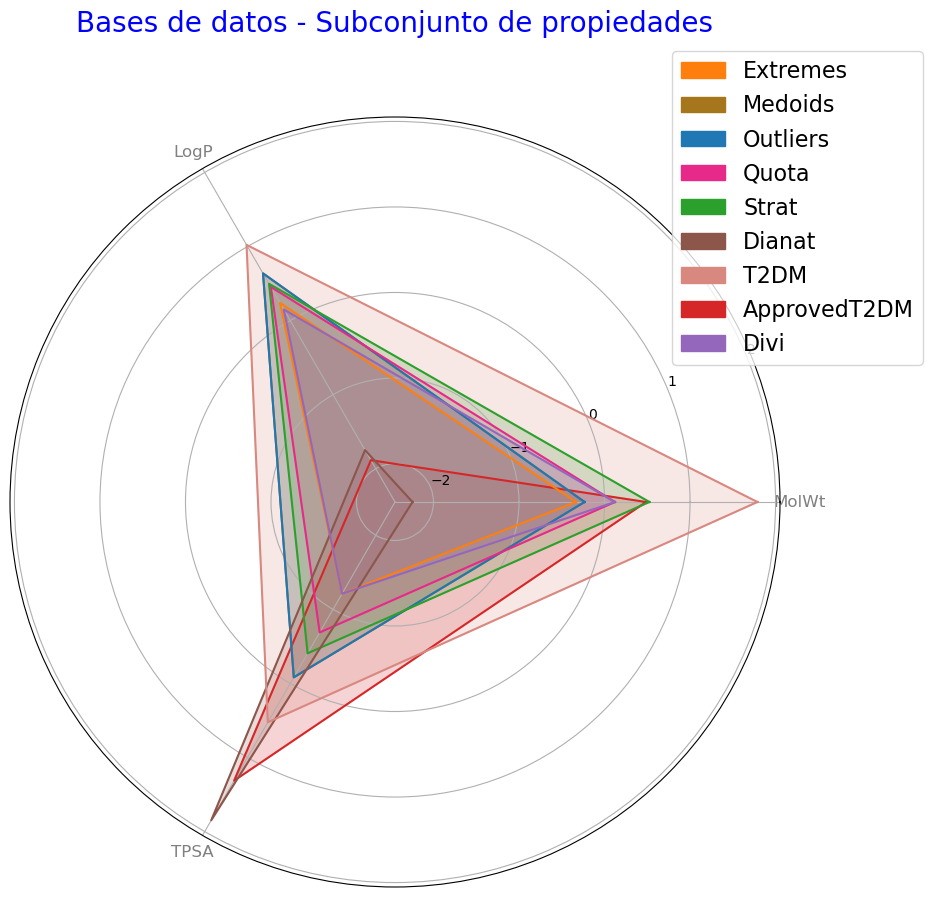

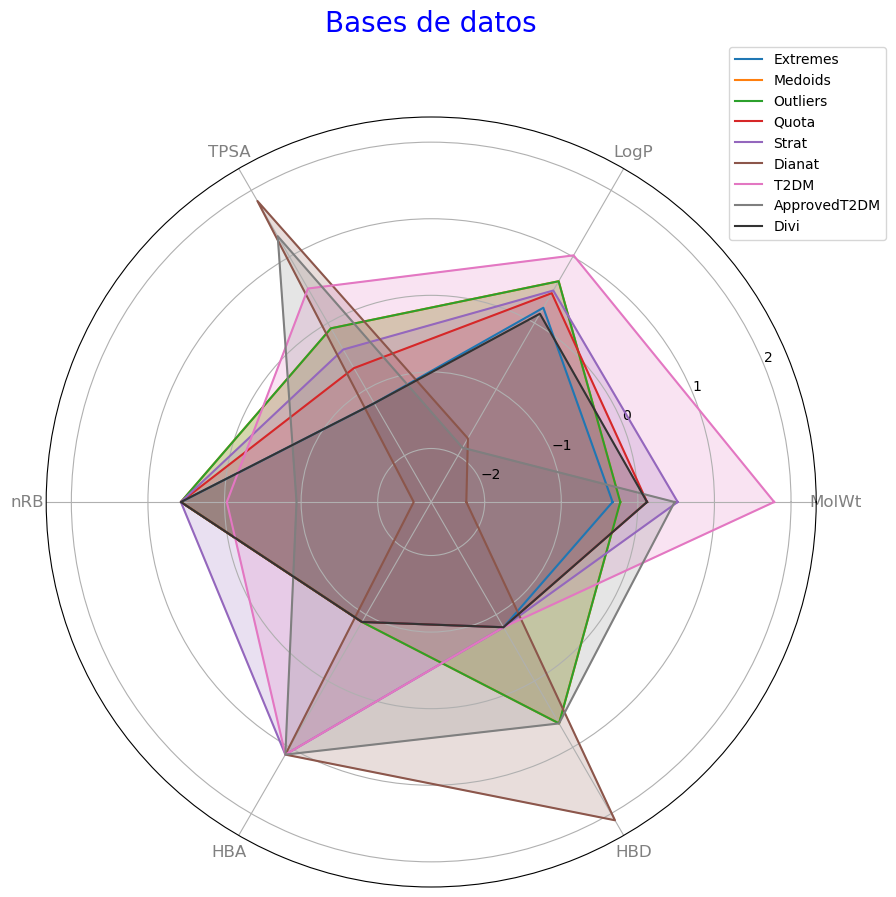

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def plot_radar_all(scaled_df, title):
    categories = list(scaled_df.columns[:-1])  # Excluye la columna de categorías
    N = len(categories)

    # Calcula los ángulos para cada categoría
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Paleta de colores específica para cada categoría
    category_colors = {
        'Extremes': '#1f77b4',
        'Medoids': '#ff7f0e',
        'Outliers': '#2ca02c',
        'Quota': '#d62728',
        'Strat': '#9467bd',
        'Dianat': '#8c564b',
        'T2DM': '#e377c2',
        'ApprovedT2DM': '#7f7f7f',
        'iSIMDiv': '#bcbd22'
    }

    # Inicializa el gráfico de radar
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    plt.xticks(angles[:-1], categories, color='grey', size=12)

    # Dibuja los datos para cada fila en el DataFrame
    for index, row in scaled_df.iterrows():
        label = row['DataFrame']
        color = category_colors.get(label, '#333333')  # Color específico o gris por defecto
        values = row.drop('DataFrame').values.flatten().tolist()
        values += values[:1]

        # Dibuja las líneas y áreas
        ax.plot(angles, values, linewidth=1.5, linestyle='solid', label=label, color=color)
        ax.fill(angles, values, color=color, alpha=0.2)

    # Añade el título y la leyenda
    plt.title(title, size=20, color='blue', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), prop={'size': 10})

    plt.show()

# Ejemplo de uso
plot_radar_all(scaled_df, 'Bases de datos')


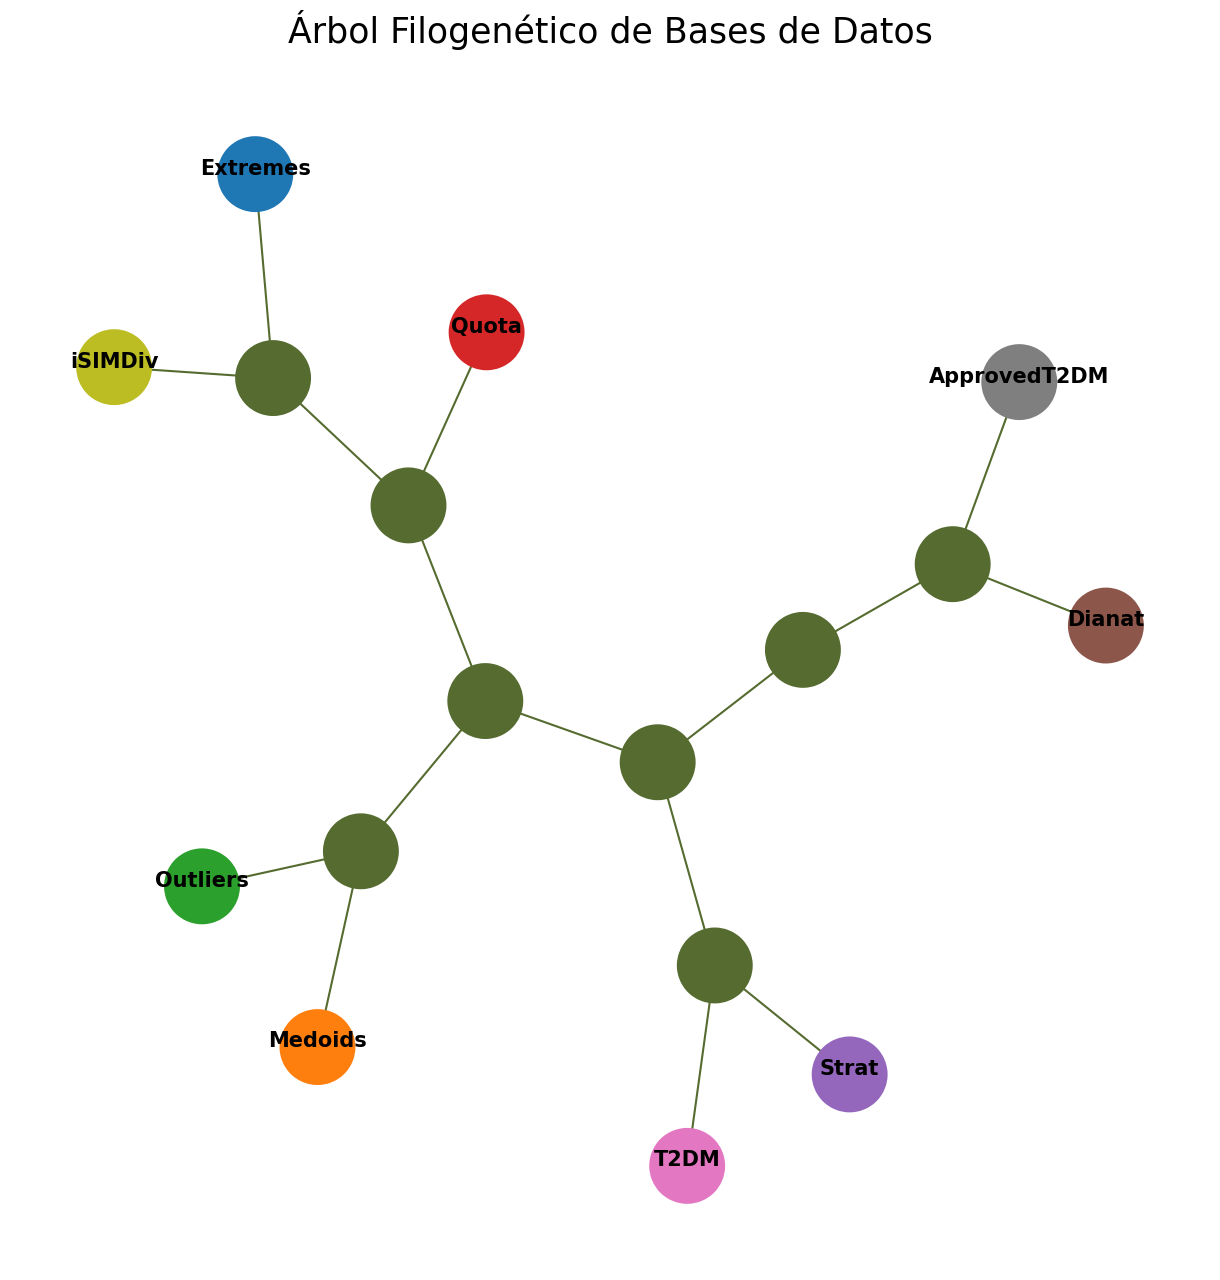

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# Calcular la matriz de distancias usando el método Ward
Z = linkage(scaled_df.iloc[:, :-1], method='ward')

# Función para construir el árbol jerárquico
def build_tree(Z, labels):
    tree = nx.DiGraph()
    n = len(Z) + 1
    for i, (left, right, dist, _) in enumerate(Z):
        left, right = int(left), int(right)
        tree.add_node(n + i, label=str(n + i), distance=dist)
        tree.add_edge(n + i, left, weight=dist)
        tree.add_edge(n + i, right, weight=dist)
    for i, label in enumerate(labels):
        tree.add_node(i, label=label, distance=0)
    return tree

# Construye el árbol
tree = build_tree(Z, scaled_df.index)

# Layout del árbol para una mejor visualización
pos = nx.drawing.nx_pydot.graphviz_layout(tree, prog='neato')

# Definir colores para cada categoría en el DataFrame
category_colors = {
    'Extremes': '#1f77b4',
    'Medoids': '#ff7f0e',
    'Outliers': '#2ca02c',
    'Quota': '#d62728',
    'Strat': '#9467bd',
    'Dianat': '#8c564b',
    'T2DM': '#e377c2',
    'ApprovedT2DM': '#7f7f7f',
    'iSIMDiv': '#bcbd22'
}

# Mapeo de colores para cada nodo
node_colors = [category_colors.get(scaled_df.loc[node, 'DataFrame'], 'tan') if node < len(scaled_df.index) else 'darkolivegreen' for node in tree.nodes()]

# Extrae etiquetas solo para las hojas
labels = {node: tree.nodes[node]['label'] if node < len(scaled_df.index) else '' for node in tree.nodes()}

# Dibujar el árbol con ajustes estéticos mejorados
plt.figure(figsize=(12, 12))
nx.draw(
    tree, pos,
    with_labels=False,
    labels=labels,
    node_size=1200,  # Ajusta el tamaño del nodo
    font_size=10,  # Ajusta el tamaño de las etiquetas
    font_color="darkolivegreen",
    font_weight='bold',
    node_color=node_colors,
    edge_color='darkolivegreen',  # Cambia el color de los bordes
    linewidths=20,  # Ajuste de grosor de los nodos
    width=1.5  # Ajuste del ancho de los bordes
)

for node in tree.nodes:
    if node < len(scaled_df.index):
        x, y = pos[node]
        plt.text(x, y + 0.15, scaled_df.loc[node, 'DataFrame'], fontsize=15, ha='center', color='black', fontweight='bold')

# Ajustes adicionales al título y etiquetas de los nodos
plt.title("Árbol Filogenético de Bases de Datos", size=25, color='black', pad=20)
plt.show()


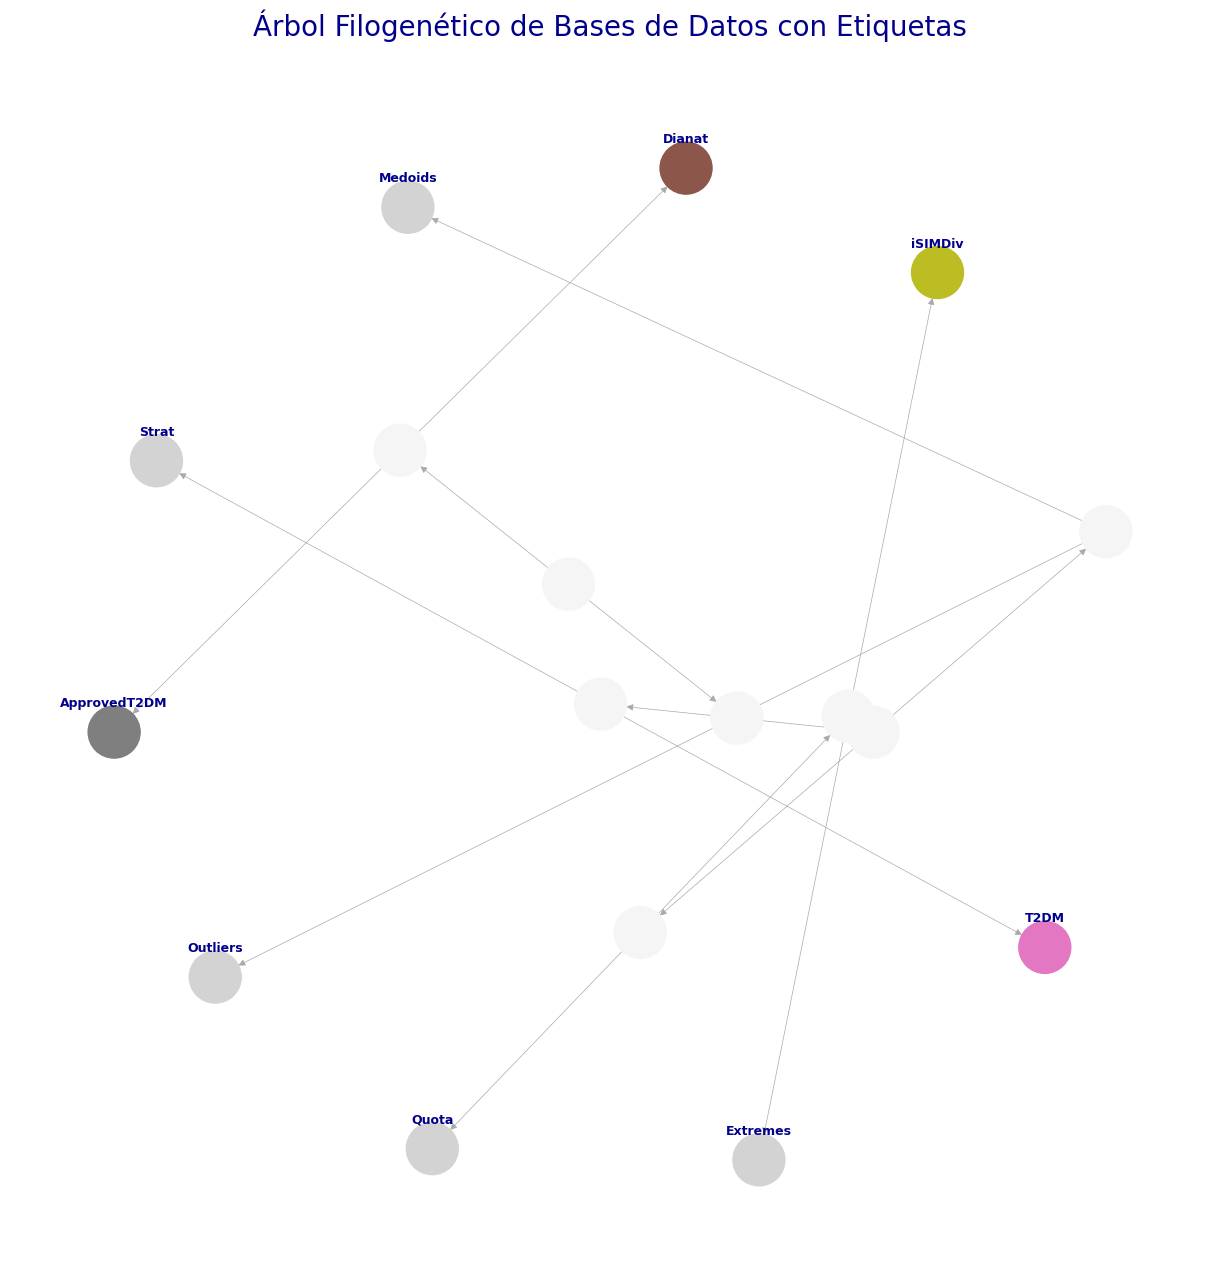

In [ ]:


import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# Calcular la matriz de distancias usando el método Ward
Z = linkage(scaled_df.iloc[:, :-1], method='ward')

# Función para construir el árbol jerárquico
def build_tree(Z, labels):
    tree = nx.DiGraph()
    n = len(Z) + 1
    for i, (left, right, dist, _) in enumerate(Z):
        left, right = int(left), int(right)
        tree.add_node(n + i, label=str(n + i), distance=dist)
        tree.add_edge(n + i, left, weight=dist)
        tree.add_edge(n + i, right, weight=dist)
    for i, label in enumerate(labels):
        tree.add_node(i, label=label, distance=0)
    return tree

# Construye el árbol
tree = build_tree(Z, scaled_df.index)

# Layout del árbol con una distancia ajustada para mejorar la visibilidad
#pos = nx.spring_layout(tree, k=1.0, iterations=1000)  # Ajusta `k` para más separación

# Colores de categorías para cada nodo de las bases de datos
category_colors = {
    'extremes': '#1f77b4',
    'medoids': '#ff7f0e',
    'outliers': '#2ca02c',
    'quota': '#d62728',
    'strat': '#9467bd',
    'Dianat': '#8c564b',
    'T2DM': '#e377c2',
    'ApprovedT2DM': '#7f7f7f',
    'iSIMDiv': '#bcbd22'
}

# Mapeo de colores para cada nodo
node_colors = [category_colors.get(scaled_df.loc[node, 'DataFrame'], 'lightgray') if node < len(scaled_df.index) else 'whitesmoke' for node in tree.nodes()]

# Extrae etiquetas solo para las hojas, e incluye el nombre de las bases de datos
labels = {node: scaled_df.loc[node, 'DataFrame'] if node < len(scaled_df.index) else '' for node in tree.nodes()}

# Dibuja el árbol con nodos y flechas personalizadas
plt.figure(figsize=(12, 12))
nx.draw(
    tree, pos,
    with_labels=False,
    labels=labels,
    node_size=1400,  # Tamaño de los nodos
    font_size=10,  # Tamaño de las etiquetas
    font_color="black",
    font_weight='bold',
    node_color=node_colors,
    edge_color='darkgray',
    linewidths=1,
    width=0.5
)

# Agregar etiquetas de las bases de datos en los nodos
for node in tree.nodes:
    if node < len(scaled_df.index):
        x, y = pos[node]
        plt.text(x, y + 0.05, scaled_df.loc[node, 'DataFrame'], fontsize=9, ha='center', color='darkblue', fontweight='bold')

# Título personalizado
plt.title("Árbol Filogenético de Bases de Datos con Etiquetas", size=20, color='darkblue', pad=20)
plt.show()
